# Simple EDA of Premier League data

**Data source** - https://www.kaggle.com/datasets/sinansaglam/europe-big-5-league-last-5-season-match-scores?resource=download

### 1. Objectives and background

The data comes from an already existing dataset on Kaggle. I chose it since football is one of my interests and I want to gain some insights about my favourite league, which is Premier League. The dataset contains data from 5 top European leagues, so potentially there could be many more insights gained and comparisons done. The goal is to do a pretty  **simple exploratory data analysis** and hopefully come to some meaningful conclusions. I will focus on a few top clubs that consistently finish high in the table over given 5 seasons. Since I possess some domain knowledge I hope to be able to verify believability of obtained insights.

### 2. Steps of the project
- Data Cleaning and Transforming (feature engineering)
- Descriptive Statistics
- Data Visualization
- Correlation Analysis
- Hypothesis Testing
- Conclusions

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib as plt
import scipy
%matplotlib inline
import re
import seaborn as sns

### Data Loading, Cleaning and Transforming

In [2]:
#loading premier league data
premier_df = pd.read_csv("premierleague-match-scores.csv", index_col = 0)
premier_df.head(10)
#print(premier_df['day'].unique())

,day,date,time,home,xg_home,score,xg_away,away,attendance,venue,referee
0,Fri,2021-08-13,20:00,Brentford,1.3,2–0,1.4,Arsenal,16479.0,Brentford Community Stadium,Michael Oliver
1,Sat,2021-08-14,12:30,Manchester Utd,1.5,5–1,0.6,Leeds United,72732.0,Old Trafford,Paul Tierney
2,Sat,2021-08-14,15:00,Watford,1.2,3–2,1.1,Aston Villa,20051.0,Vicarage Road Stadium,Mike Dean
3,Sat,2021-08-14,15:00,Chelsea,0.9,3–0,0.3,Crystal Palace,38965.0,Stamford Bridge,Jonathan Moss
4,Sat,2021-08-14,15:00,Everton,2.4,3–1,0.7,Southampton,38487.0,Goodison Park,Andy Madley
5,Sat,2021-08-14,15:00,Burnley,1.0,1–2,1.3,Brighton,16910.0,Turf Moor,David Coote
6,Sat,2021-08-14,15:00,Leicester City,0.8,1–0,1.1,Wolves,31983.0,King Power Stadium,Craig Pawson
7,Sat,2021-08-14,17:30,Norwich City,1.4,0–3,2.0,Liverpool,27023.0,Carrow Road,Andre Marriner
8,Sun,2021-08-15,14:00,Newcastle Utd,1.5,2–4,2.3,West Ham,50673.0,St. James' Park,Martin Atkinson
9,Sun,2021-08-15,16:30,Tottenham,1.3,1–0,1.9,Manchester City,58262.0,Tottenham Hotspur Stadium,Anthony Taylor


**The data contains columns like the day of the game, the exact date and time, names of home and away teams, attendance and the venue, the name of the referee, the score of the game and also expected number of goals for each team.**

In [3]:
premier_df.info() #there's some missing data in attendance column but we are gonna drop it for the time being so it's not important

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1900 entries, 0 to 2154
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   day         1900 non-null   object 
 1   date        1900 non-null   object 
 2   time        1900 non-null   object 
 3   home        1900 non-null   object 
 4   xg_home     1900 non-null   float64
 5   score       1900 non-null   object 
 6   xg_away     1900 non-null   float64
 7   away        1900 non-null   object 
 8   attendance  1460 non-null   float64
 9   venue       1900 non-null   object 
 10  referee     1900 non-null   object 
dtypes: float64(3), object(8)
memory usage: 178.1+ KB


**Now we are gonna extract the information from the score column and create instead of it two columns with the number of home goals and away goals.**

In [4]:
score_home = [int(re.findall(r'\d+', x)[0]) for x in premier_df["score"]]
score_away = [int(re.findall(r'\d+', x)[1]) for x in premier_df["score"]]
premier_df["home_goals"] = score_home
premier_df["away_goals"] = score_away
premier_df = premier_df.drop(["venue", "score", "attendance"], axis = 1)#dropping the venue column since it is usually the same for most of the clubs throughout the season (many seasons)

In [5]:
premier_df

,day,date,time,home,xg_home,xg_away,away,referee,home_goals,away_goals
0,Fri,2021-08-13,20:00,Brentford,1.3,1.4,Arsenal,Michael Oliver,2,0
1,Sat,2021-08-14,12:30,Manchester Utd,1.5,0.6,Leeds United,Paul Tierney,5,1
2,Sat,2021-08-14,15:00,Watford,1.2,1.1,Aston Villa,Mike Dean,3,2
3,Sat,2021-08-14,15:00,Chelsea,0.9,0.3,Crystal Palace,Jonathan Moss,3,0
4,Sat,2021-08-14,15:00,Everton,2.4,0.7,Southampton,Andy Madley,3,1
...,...,...,...,...,...,...,...,...,...,...
2150,Sun,2018-05-13,15:00,West Ham,0.9,1.7,Everton,Graham Scott,3,1
2151,Sun,2018-05-13,15:00,Huddersfield,1.5,2.1,Arsenal,Michael Oliver,0,1
2152,Sun,2018-05-13,15:00,Tottenham,2.2,1.7,Leicester City,Craig Pawson,5,4
2153,Sun,2018-05-13,15:00,Crystal Palace,2.4,0.3,West Brom,Jonathan Moss,2,0


In [6]:
#create a season column
def get_season(date):
    year = date.year
    if date.month < 8:
        return f'{year-1}/{year}'
    else:
        return f'{year}/{year+1}'
    
premier_df['season'] = pd.to_datetime(premier_df['date']).apply(get_season)
premier_df['season'] = premier_df['season'].astype('category')
print(premier_df['season'].value_counts()) #checking that season category was assigned correctly

# Create home_result and away_result columns
premier_df['home_result'] = 'T'  # default value is tie
premier_df.loc[premier_df['home_goals'] > premier_df['away_goals'], 'home_result'] = 'W'
premier_df.loc[premier_df['home_goals'] < premier_df['away_goals'], 'home_result'] = 'L'
premier_df['away_result'] = 'T'  # default value is tie
premier_df.loc[premier_df['home_goals'] < premier_df['away_goals'], 'away_result'] = 'W'
premier_df.loc[premier_df['home_goals'] > premier_df['away_goals'], 'away_result'] = 'L'

# Create home_result_pred and away_result_pred columns
premier_df['home_result_pred'] = 'T'  # default value is tie
premier_df.loc[premier_df['xg_home'] > premier_df['xg_away'], 'home_result_pred'] = 'W'
premier_df.loc[premier_df['xg_home'] < premier_df['xg_away'], 'home_result_pred'] = 'L'
premier_df['away_result_pred'] = 'T'  # default value is tie
premier_df.loc[premier_df['xg_home'] < premier_df['xg_away'], 'away_result_pred'] = 'W'
premier_df.loc[premier_df['xg_home'] > premier_df['xg_away'], 'away_result_pred'] = 'L'

2017/2018    380
2018/2019    380
2019/2020    380
2020/2021    380
2021/2022    380
Name: season, dtype: int64


In [7]:
premier_df

,day,date,time,home,xg_home,xg_away,away,referee,home_goals,away_goals,season,home_result,away_result,home_result_pred,away_result_pred
0,Fri,2021-08-13,20:00,Brentford,1.3,1.4,Arsenal,Michael Oliver,2,0,2021/2022,W,L,L,W
1,Sat,2021-08-14,12:30,Manchester Utd,1.5,0.6,Leeds United,Paul Tierney,5,1,2021/2022,W,L,W,L
2,Sat,2021-08-14,15:00,Watford,1.2,1.1,Aston Villa,Mike Dean,3,2,2021/2022,W,L,W,L
3,Sat,2021-08-14,15:00,Chelsea,0.9,0.3,Crystal Palace,Jonathan Moss,3,0,2021/2022,W,L,W,L
4,Sat,2021-08-14,15:00,Everton,2.4,0.7,Southampton,Andy Madley,3,1,2021/2022,W,L,W,L
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2150,Sun,2018-05-13,15:00,West Ham,0.9,1.7,Everton,Graham Scott,3,1,2017/2018,W,L,L,W
2151,Sun,2018-05-13,15:00,Huddersfield,1.5,2.1,Arsenal,Michael Oliver,0,1,2017/2018,L,W,L,W
2152,Sun,2018-05-13,15:00,Tottenham,2.2,1.7,Leicester City,Craig Pawson,5,4,2017/2018,W,L,W,L
2153,Sun,2018-05-13,15:00,Crystal Palace,2.4,0.3,West Brom,Jonathan Moss,2,0,2017/2018,W,L,W,L


## Descriptive Statistics

**From newly created columns for results and expected results we can investigate how accurate is the prediction of the winner. For now let's count the percentage of correct predictions.**

In [8]:
#Create a new column for correct predictions
premier_df['correct_prediction'] = (premier_df['home_result'] == premier_df['home_result_pred']).astype(int)

#Calculate the percentage of correct predictions
percentage_correct = (premier_df['correct_prediction'].sum() / len(premier_df)) * 100

print(f"Percentage of correct predictions: {percentage_correct:.2f}%")

Percentage of correct predictions: 61.26%


Let's calculate some of the summary statistics for the 5 chosen teams of interest. We can notice for example that all of the teams scored more goals than expected. Further, we can investigate if the difference is statistically significant.

In [9]:
# Define list of teams of interest
teams_of_interest = ['Arsenal', 'Manchester City', 'Manchester Utd', 'Liverpool', 'Tottenham']

# Loop through each team and calculate summary statistics
for team in teams_of_interest:
    print(f'Summary statistics for {team}:')
    team_df = premier_df[(premier_df['home'] == team) | (premier_df['away'] == team)]
    print(f"Number of matches: {len(team_df)}")
    print(f"Total goals scored: {team_df.loc[team_df['home'] == team, 'home_goals'].sum() + team_df.loc[team_df['away'] == team, 'away_goals'].sum()}")
    print(f"Average number of goals scored per season: {np.round(team_df.loc[team_df['home'] == team, 'home_goals'].sum()/5. + team_df.loc[team_df['away'] == team, 'away_goals'].sum()/5., 2)}")
    print(f"Total expected goals: {np.round(team_df.loc[team_df['home'] == team, 'xg_home'].sum() + team_df.loc[team_df['away'] == team, 'xg_away'].sum(), 2)}")
    print(f"Average number of expected goals per season: {np.round(team_df.loc[team_df['home'] == team, 'xg_home'].sum()/5. + team_df.loc[team_df['away'] == team, 'xg_away'].sum()/5., 2)}")
    team_df.loc[team_df['home'] == team, 'goal_diff'] = team_df['home_goals'] - team_df['away_goals']
    team_df.loc[team_df['away'] == team, 'goal_diff'] = team_df['away_goals'] - team_df['home_goals']
    print(f"Goal difference: {team_df['goal_diff'].sum()}")
    print(f"Average goal difference per season: {team_df['goal_diff'].sum()/5.}")
    #print(f"Referee bias: {team_df[team_df['referee'] == 'ref_name']['home_goals'].sum() - team_df[team_df['referee'] == 'ref_name']['away_goals'].sum()}")
    print("\n")

Summary statistics for Arsenal:
Number of matches: 190
Total goals scored: 319
Average number of goals scored per season: 63.8
Total expected goals: 289.9
Average number of expected goals per season: 57.98
Goal difference: 82.0
Average goal difference per season: 16.4


Summary statistics for Manchester City:
Number of matches: 190
Total goals scored: 485
Average number of goals scored per season: 97.0
Total expected goals: 426.2
Average number of expected goals per season: 85.24
Goal difference: 342.0
Average goal difference per season: 68.4


Summary statistics for Manchester Utd:
Number of matches: 190
Total goals scored: 329
Average number of goals scored per season: 65.8
Total expected goals: 293.9
Average number of expected goals per season: 58.78
Goal difference: 110.0
Average goal difference per season: 22.0


Summary statistics for Liverpool:
Number of matches: 190
Total goals scored: 420
Average number of goals scored per season: 84.0
Total expected goals: 382.0
Average numbe

C:\Users\shpak\AppData\Local\Temp\ipykernel_12504\3660746253.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_df.loc[team_df['home'] == team, 'goal_diff'] = team_df['home_goals'] - team_df['away_goals']
C:\Users\shpak\AppData\Local\Temp\ipykernel_12504\3660746253.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_df.loc[team_df['home'] == team, 'goal_diff'] = team_df['home_goals'] - team_df['away_goals']
C:\Users\shpak\AppData\Local\Temp\ipykernel_12504\3660746253.py:13: SettingWithCopyWarni

Here I define a few clubs that usually perform lower but played in PL for all 5 seasons and have negative goal differences. We can notice that most of them score less than expected or very close except West Ham.

In [10]:
# Define list of teams of interest
teams_of_interest2 = ['Southampton', 'Brighton', 'Everton', 'Crystal Palace', 'West Ham']

# Loop through each team and calculate summary statistics
for team in teams_of_interest2:
    print(f'Summary statistics for {team}:')
    team_df = premier_df[(premier_df['home'] == team) | (premier_df['away'] == team)]
    print(f"Number of matches: {len(team_df)}")
    print(f"Total goals scored: {team_df.loc[team_df['home'] == team, 'home_goals'].sum() + team_df.loc[team_df['away'] == team, 'away_goals'].sum()}")
    print(f"Average number of goals scored per season: {np.round(team_df.loc[team_df['home'] == team, 'home_goals'].sum()/5. + team_df.loc[team_df['away'] == team, 'away_goals'].sum()/5., 2)}")
    print(f"Total expected goals: {np.round(team_df.loc[team_df['home'] == team, 'xg_home'].sum() + team_df.loc[team_df['away'] == team, 'xg_away'].sum(), 2)}")
    print(f"Average number of expected goals per season: {np.round(team_df.loc[team_df['home'] == team, 'xg_home'].sum()/5. + team_df.loc[team_df['away'] == team, 'xg_away'].sum()/5., 2)}")
    team_df.loc[team_df['home'] == team, 'goal_diff'] = team_df['home_goals'] - team_df['away_goals']
    team_df.loc[team_df['away'] == team, 'goal_diff'] = team_df['away_goals'] - team_df['home_goals']
    print(f"Goal difference: {team_df['goal_diff'].sum()}")
    print(f"Average goal difference per season: {team_df['goal_diff'].sum()/5.}")
    #print(f"Referee bias: {team_df[team_df['referee'] == 'ref_name']['home_goals'].sum() - team_df[team_df['referee'] == 'ref_name']['away_goals'].sum()}")
    print("\n")

Summary statistics for Southampton:
Number of matches: 190
Total goals scored: 223
Average number of goals scored per season: 44.6
Total expected goals: 232.3
Average number of expected goals per season: 46.46
Goal difference: -93.0
Average goal difference per season: -18.6


Summary statistics for Brighton:
Number of matches: 190
Total goals scored: 190
Average number of goals scored per season: 38.0
Total expected goals: 209.9
Average number of expected goals per season: 41.98
Goal difference: -68.0
Average goal difference per season: -13.6


Summary statistics for Everton:
Number of matches: 190
Total goals scored: 232
Average number of goals scored per season: 46.4
Total expected goals: 229.6
Average number of expected goals per season: 45.92
Goal difference: -42.0
Average goal difference per season: -8.4


Summary statistics for Crystal Palace:
Number of matches: 190
Total goals scored: 218
Average number of goals scored per season: 43.6
Total expected goals: 219.5
Average number 

C:\Users\shpak\AppData\Local\Temp\ipykernel_12504\899193149.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_df.loc[team_df['home'] == team, 'goal_diff'] = team_df['home_goals'] - team_df['away_goals']
C:\Users\shpak\AppData\Local\Temp\ipykernel_12504\899193149.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_df.loc[team_df['home'] == team, 'goal_diff'] = team_df['home_goals'] - team_df['away_goals']
C:\Users\shpak\AppData\Local\Temp\ipykernel_12504\899193149.py:13: SettingWithCopyWarning:

Here I'm creating separate dataframes for each team of interest and we'll use them in some of the investigations.

In [11]:
#automating the process of creating separate tables for teams of interest
def create_team_dataframe(df, team_name):
    df = df.drop(["home_result", "away_result", "home_result_pred", "away_result_pred"], axis = 1)
    team_df = df[np.logical_or(df["home"] == team_name, df["away"] == team_name)]
    team_df_home = team_df[team_df["home"] == team_name].copy()
    team_df_away = team_df[team_df["away"] == team_name].copy()
    
    team_df_home['result'] = team_df_home.apply(lambda row: 'W' if row['home_goals'] > row['away_goals'] else ('L' if row['home_goals'] < row['away_goals'] else 'T'), axis=1)
    team_df_home['result_pred'] = team_df_home.apply(lambda row: 'W' if row['xg_home'] > row['xg_away'] else ('L' if row['xg_home'] < row['xg_away'] else 'T'), axis=1)
    team_df_away['result'] = team_df_away.apply(lambda row: 'W' if row['home_goals'] < row['away_goals'] else ('L' if row['home_goals'] > row['away_goals'] else 'T'), axis=1)
    team_df_away['result_pred'] = team_df_away.apply(lambda row: 'W' if row['xg_home'] < row['xg_away'] else ('L' if row['xg_home'] > row['xg_away'] else 'T'), axis=1)
    
    return team_df_home, team_df_away

# Creating dataframes for Arsenal, MC, MU, Liverpool ans Tottenham
arsenal_home_df, arsenal_away_df = create_team_dataframe(premier_df, 'Arsenal')
mc_home_df, mc_away_df = create_team_dataframe(premier_df, 'Manchester City')
mu_home_df, mu_away_df = create_team_dataframe(premier_df, 'Manchester Utd')
liv_home_df, liv_away_df = create_team_dataframe(premier_df, 'Liverpool')
tot_home_df, tot_away_df = create_team_dataframe(premier_df, 'Tottenham')

print("Arsenal Home Matches:")
arsenal_home_df

Arsenal Home Matches:


,day,date,time,home,xg_home,xg_away,away,referee,home_goals,away_goals,season,correct_prediction,result,result_pred
19,Sun,2021-08-22,16:30,Arsenal,0.3,2.9,Chelsea,Paul Tierney,0,2,2021/2022,1,L,L
36,Sat,2021-09-11,15:00,Arsenal,2.8,0.6,Norwich City,Michael Oliver,1,0,2021/2022,1,W,W
63,Sun,2021-09-26,16:30,Arsenal,0.8,1.0,Tottenham,Craig Pawson,3,1,2021/2022,0,W,L
86,Mon,2021-10-18,20:00,Arsenal,1.4,0.9,Crystal Palace,Mike Dean,2,2,2021/2022,0,T,W
88,Fri,2021-10-22,20:00,Arsenal,2.7,1.4,Aston Villa,Craig Pawson,3,1,2021/2022,1,W,W
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2059,Sun,2018-03-11,13:30,Arsenal,2.8,1.5,Watford,Martin Atkinson,3,0,2017/2018,1,W,W
2076,Sun,2018-04-01,13:30,Arsenal,4.0,0.4,Stoke City,Craig Pawson,3,0,2017/2018,1,W,W
2087,Sun,2018-04-08,14:15,Arsenal,1.8,2.2,Southampton,Andre Marriner,3,2,2017/2018,0,W,L
2110,Sun,2018-04-22,13:30,Arsenal,1.5,1.1,West Ham,Lee Mason,4,1,2017/2018,1,W,W


In [12]:
arsenal_away_df.head()

,day,date,time,home,xg_home,xg_away,away,referee,home_goals,away_goals,season,correct_prediction,result,result_pred
0,Fri,2021-08-13,20:00,Brentford,1.3,1.4,Arsenal,Michael Oliver,2,0,2021/2022,0,L,W
22,Sat,2021-08-28,12:30,Manchester City,3.8,0.1,Arsenal,Martin Atkinson,5,0,2021/2022,1,L,L
49,Sat,2021-09-18,15:00,Burnley,1.3,1.2,Arsenal,Anthony Taylor,0,1,2021/2022,0,W,L
71,Sat,2021-10-02,17:30,Brighton,1.4,0.5,Arsenal,Jonathan Moss,0,0,2021/2022,0,T,L
99,Sat,2021-10-30,12:30,Leicester City,1.2,0.9,Arsenal,Michael Oliver,0,2,2021/2022,0,W,L


In [13]:
#combining everything for teams of interest
arsenal = pd.concat([arsenal_home_df, arsenal_away_df], axis = 0)
mc = pd.concat([mc_home_df, mc_away_df], axis = 0)
mu = pd.concat([mu_home_df, mu_away_df], axis = 0)
liverpool = pd.concat([liv_home_df, liv_away_df], axis = 0)
tottenham = pd.concat([tot_home_df, tot_away_df], axis = 0)
arsenal

,day,date,time,home,xg_home,xg_away,away,referee,home_goals,away_goals,season,correct_prediction,result,result_pred
19,Sun,2021-08-22,16:30,Arsenal,0.3,2.9,Chelsea,Paul Tierney,0,2,2021/2022,1,L,L
36,Sat,2021-09-11,15:00,Arsenal,2.8,0.6,Norwich City,Michael Oliver,1,0,2021/2022,1,W,W
63,Sun,2021-09-26,16:30,Arsenal,0.8,1.0,Tottenham,Craig Pawson,3,1,2021/2022,0,W,L
86,Mon,2021-10-18,20:00,Arsenal,1.4,0.9,Crystal Palace,Mike Dean,2,2,2021/2022,0,T,W
88,Fri,2021-10-22,20:00,Arsenal,2.7,1.4,Aston Villa,Craig Pawson,3,1,2021/2022,1,W,W
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2048,Sun,2018-03-04,13:30,Brighton,0.9,1.3,Arsenal,Stuart Attwell,2,1,2017/2018,0,L,W
2097,Sun,2018-04-15,13:30,Newcastle Utd,1.1,1.1,Arsenal,Anthony Taylor,2,1,2017/2018,0,L,T
2122,Sun,2018-04-29,16:30,Manchester Utd,1.7,0.4,Arsenal,Kevin Friend,2,1,2017/2018,1,L,L
2137,Wed,2018-05-09,19:45,Leicester City,2.2,1.4,Arsenal,Graham Scott,3,1,2017/2018,1,L,L


In [14]:
mc

,day,date,time,home,xg_home,xg_away,away,referee,home_goals,away_goals,season,correct_prediction,result,result_pred
15,Sat,2021-08-21,15:00,Manchester City,2.7,0.1,Norwich City,Graham Scott,5,0,2021/2022,1,W,W
22,Sat,2021-08-28,12:30,Manchester City,3.8,0.1,Arsenal,Martin Atkinson,5,0,2021/2022,1,W,W
48,Sat,2021-09-18,15:00,Manchester City,1.1,0.4,Southampton,Jonathan Moss,0,0,2021/2022,0,T,W
80,Sat,2021-10-16,15:00,Manchester City,1.9,1.0,Burnley,Martin Atkinson,2,0,2021/2022,1,W,W
104,Sat,2021-10-30,15:00,Manchester City,1.1,1.1,Crystal Palace,Andre Marriner,0,2,2021/2022,0,L,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,Mon,2018-03-12,20:00,Stoke City,0.3,1.7,Manchester City,Jonathan Moss,0,2,2017/2018,1,W,W
2075,Sat,2018-03-31,17:30,Everton,0.4,1.7,Manchester City,Paul Tierney,1,3,2017/2018,1,W,W
2096,Sat,2018-04-14,19:45,Tottenham,0.5,2.9,Manchester City,Jonathan Moss,1,3,2017/2018,1,W,W
2121,Sun,2018-04-29,14:15,West Ham,0.3,2.6,Manchester City,Niel Swarbrick,1,4,2017/2018,1,W,W


In [15]:
#Creating a big summary table of average scores home and away for teams of interest
team_season_summary = []
for team in teams_of_interest:
    team_mask_home = (premier_df['home'] == team)
    team_df = premier_df.loc[team_mask_home]
    team_summary_home = team_df.groupby(['season']).agg({'home_goals': 'mean',
                                                     'xg_home': 'mean'})
    team_summary_home.columns = [f"{team}_{col}" for col in team_summary_home.columns]
    team_season_summary.append(team_summary_home)
    team_mask_away = (premier_df['away'] == team)
    team_df = premier_df.loc[team_mask_away]
    team_summary_away = team_df.groupby(['season']).agg({'away_goals': 'mean',
                                                     'xg_away': 'mean'})
    team_summary_away.columns = [f"{team}_{col}" for col in team_summary_away.columns]
    team_season_summary.append(team_summary_away)

# Combine team and season summary dataframes
team_season_summary = pd.concat(team_season_summary, axis=1)
team_season_summary

,Arsenal_home_goals,Arsenal_xg_home,Arsenal_away_goals,Arsenal_xg_away,Manchester City_home_goals,Manchester City_xg_home,Manchester City_away_goals,Manchester City_xg_away,Manchester Utd_home_goals,Manchester Utd_xg_home,Manchester Utd_away_goals,Manchester Utd_xg_away,Liverpool_home_goals,Liverpool_xg_home,Liverpool_away_goals,Liverpool_xg_away,Tottenham_home_goals,Tottenham_xg_home,Tottenham_away_goals,Tottenham_xg_away
season,,,,,,,,,,,,,,,,,,,,
2017/2018,2.842105,2.347368,1.052632,1.242105,3.210526,2.536842,2.368421,1.994737,2.000000,1.757895,1.578947,1.436842,2.368421,2.178947,2.052632,1.652632,2.105263,1.884211,1.789474,1.668421
2018/2019,2.210526,1.821053,1.631579,1.300000,3.000000,2.573684,2.000000,1.889474,1.736842,1.652632,1.684211,1.442105,2.894737,2.294737,1.789474,1.673684,1.789474,1.742105,1.736842,1.331579
2019/2020,1.894737,1.431579,1.052632,1.152632,3.000000,2.494737,2.368421,2.400000,2.105263,1.631579,1.368421,1.494737,2.736842,2.126316,1.736842,1.647368,1.894737,1.289474,1.315789,1.126316
2020/2021,1.263158,1.300000,1.631579,1.515789,2.263158,2.089474,2.105263,1.768421,2.000000,1.663158,1.842105,1.510526,1.526316,1.889474,2.052632,1.952632,1.842105,1.542105,1.736842,1.326316
2021/2022,1.842105,1.878947,1.368421,1.268421,3.052632,2.368421,2.157895,2.315789,1.684211,1.578947,1.315789,1.300000,2.578947,2.563158,2.368421,2.126316,2.000000,1.878947,1.631579,1.547368


In [16]:
#season summary for the same numbers but for all teams combined
season_summary = premier_df.groupby('season').agg({'home_goals': 'mean',
                                                   'away_goals': 'mean',
                                                   'xg_home': 'mean',
                                                   'xg_away': 'mean'})
season_summary

,home_goals,away_goals,xg_home,xg_away
season,,,,
2017/2018,1.531579,1.147368,1.467368,1.122105
2018/2019,1.568421,1.252632,1.480263,1.180263
2019/2020,1.515789,1.205263,1.419737,1.221579
2020/2021,1.352632,1.342105,1.370263,1.261579
2021/2022,1.513158,1.305263,1.477895,1.243947


We can notice that top teams exceed significantly (not statistical significance, not checking it here) the average numbers except a couple of fields. We'll check significance later.

### Data Vizualizations

- Here we'll plot some dynamics of teams of interest over given seasons by numbers of scored goals, missed goals, goal differences.
- Also we'll built count plots for wins, losses and ties for those clubs.
- Moreover, I'd like to check referee bias to see if anything unusual pops out - **that is not done here yet**, I did some vizualizations here but haven't drawn any conclusions yet and haven't tested anything for referee bias later.

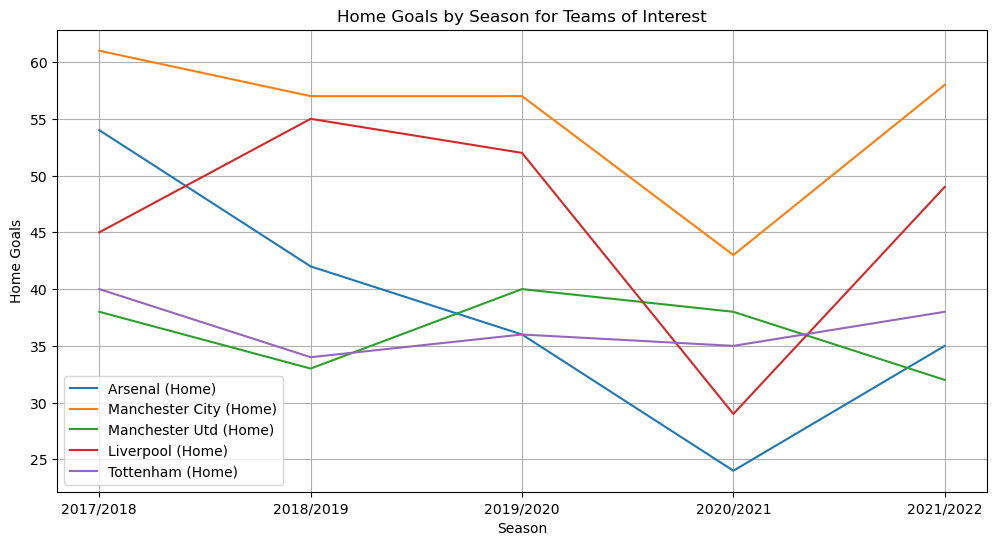

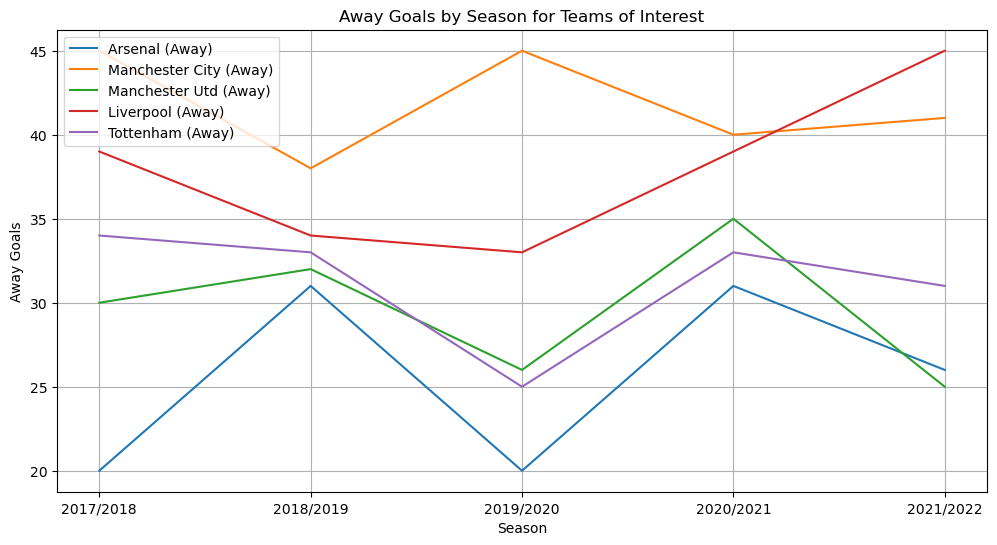

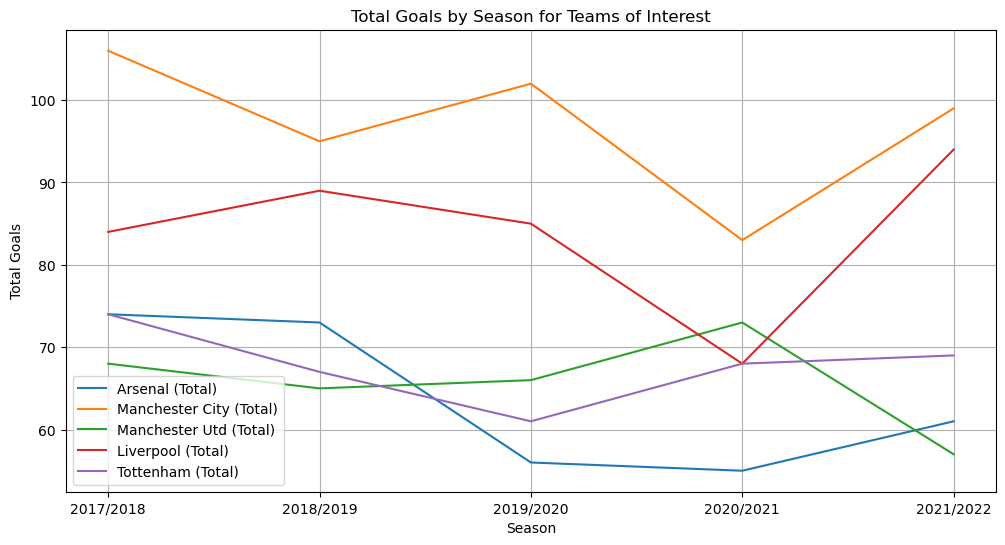

In [17]:
import matplotlib.pyplot as plt
teams_of_interest = ['Arsenal', 'Manchester City', 'Manchester Utd', 'Liverpool', 'Tottenham']
filtered_df = premier_df[(premier_df['home'].isin(teams_of_interest)) | (premier_df['away'].isin(teams_of_interest))]

# Calculate home goals, away goals, and total goals by season
home_goals_by_season = filtered_df.groupby(['season', 'home'])['home_goals'].sum()
away_goals_by_season = filtered_df.groupby(['season', 'away'])['away_goals'].sum()
total_goals_by_season = home_goals_by_season.add(away_goals_by_season, fill_value=0)

# Separate the data for each team of interest
team_home_goals = home_goals_by_season.unstack().fillna(0).T
team_away_goals = away_goals_by_season.unstack().fillna(0).T
team_total_goals = total_goals_by_season.unstack().fillna(0).T

# Plot home goals by season for teams of interest
plt.figure(figsize=(12, 6))
for team in teams_of_interest:
    plt.plot(team_home_goals.columns, team_home_goals.loc[team], label=f'{team} (Home)')

plt.xlabel('Season')
plt.ylabel('Home Goals')
plt.title('Home Goals by Season for Teams of Interest')
plt.legend()
plt.grid(True)
plt.show()

# Plot away goals by season for teams of interest
plt.figure(figsize=(12, 6))
for team in teams_of_interest:
    plt.plot(team_away_goals.columns, team_away_goals.loc[team], label=f'{team} (Away)')

plt.xlabel('Season')
plt.ylabel('Away Goals')
plt.title('Away Goals by Season for Teams of Interest')
plt.legend()
plt.grid(True)
plt.show()

# Plot total goals by season for teams of interest
plt.figure(figsize=(12, 6))
for team in teams_of_interest:
    plt.plot(team_total_goals.columns, team_total_goals.loc[team], label=f'{team} (Total)')

plt.xlabel('Season')
plt.ylabel('Total Goals')
plt.title('Total Goals by Season for Teams of Interest')
plt.legend()
plt.grid(True)
plt.show()

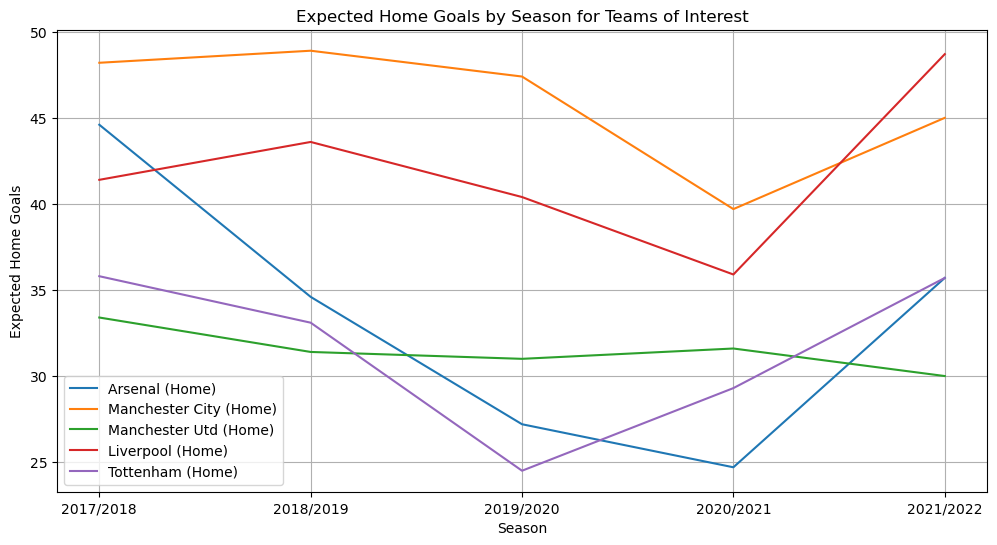

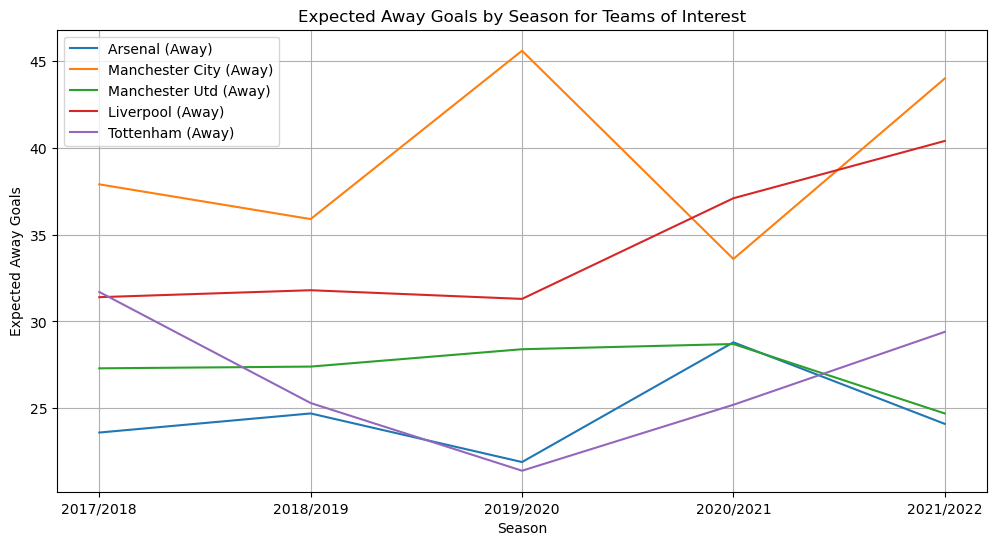

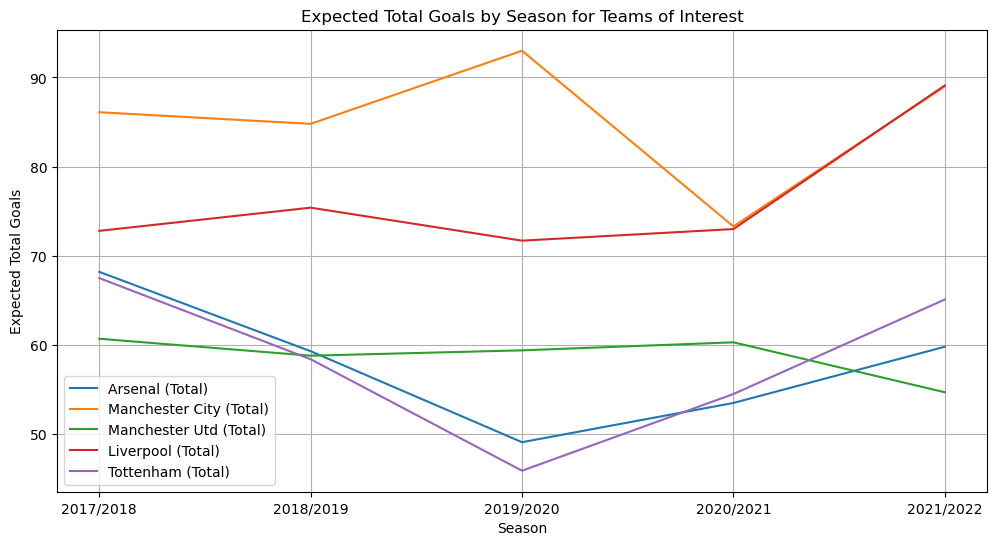

In [18]:
# Calculate expected home goals, away goals, and total goals by season
xp_home_goals_by_season = filtered_df.groupby(['season', 'home'])['xg_home'].sum()
xp_away_goals_by_season = filtered_df.groupby(['season', 'away'])['xg_away'].sum()
xp_total_goals_by_season = xp_home_goals_by_season.add(xp_away_goals_by_season, fill_value=0)

# Separate the data for each team of interest
team_xp_home_goals = xp_home_goals_by_season.unstack().fillna(0).T
team_xp_away_goals = xp_away_goals_by_season.unstack().fillna(0).T
team_xp_total_goals = xp_total_goals_by_season.unstack().fillna(0).T

# Plot expected home goals by season for teams of interest
plt.figure(figsize=(12, 6))
for team in teams_of_interest:
    plt.plot(team_xp_home_goals.columns, team_xp_home_goals.loc[team], label=f'{team} (Home)')

plt.xlabel('Season')
plt.ylabel('Expected Home Goals')
plt.title('Expected Home Goals by Season for Teams of Interest')
plt.legend()
plt.grid(True)
plt.show()

# Plot expected away goals by season for teams of interest
plt.figure(figsize=(12, 6))
for team in teams_of_interest:
    plt.plot(team_xp_away_goals.columns, team_xp_away_goals.loc[team], label=f'{team} (Away)')

plt.xlabel('Season')
plt.ylabel('Expected Away Goals')
plt.title('Expected Away Goals by Season for Teams of Interest')
plt.legend()
plt.grid(True)
plt.show()

# Plot expected total goals by season for teams of interest
plt.figure(figsize=(12, 6))
for team in teams_of_interest:
    plt.plot(team_xp_total_goals.columns, team_xp_total_goals.loc[team], label=f'{team} (Total)')

plt.xlabel('Season')
plt.ylabel('Expected Total Goals')
plt.title('Expected Total Goals by Season for Teams of Interest')
plt.legend()
plt.grid(True)
plt.show()

Here we plot by season home goals and away goals in one plot and in the second plot in a row we plot the same for expected goals (xG) for the same team. We do it for each team of interest. We can notice that pretty much consistently home goals (and xG) exceed away goals.

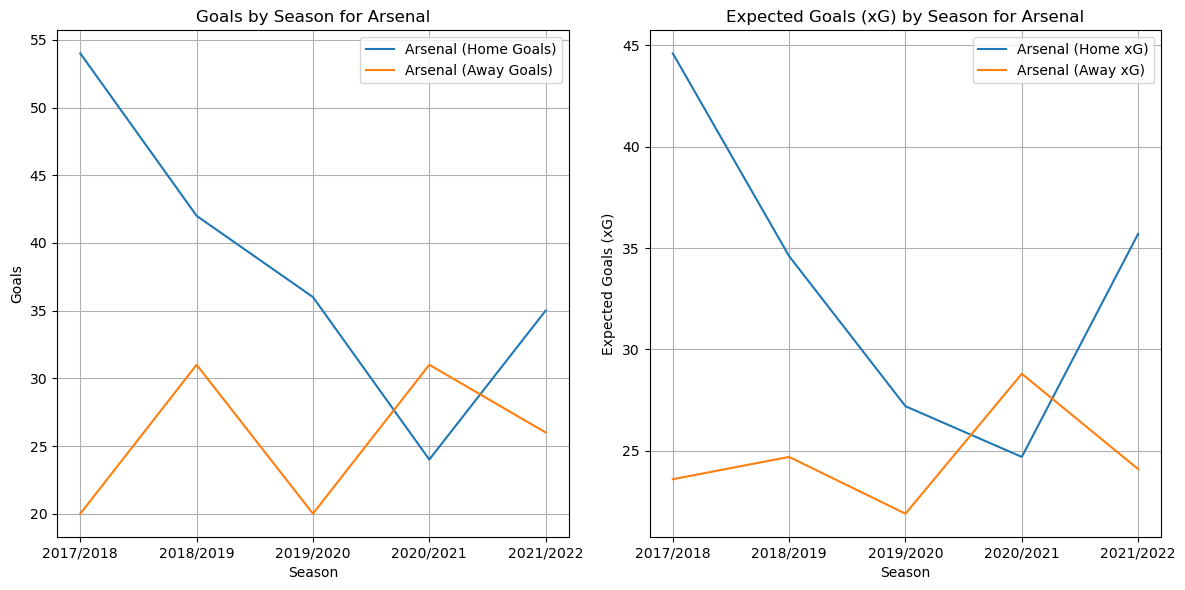

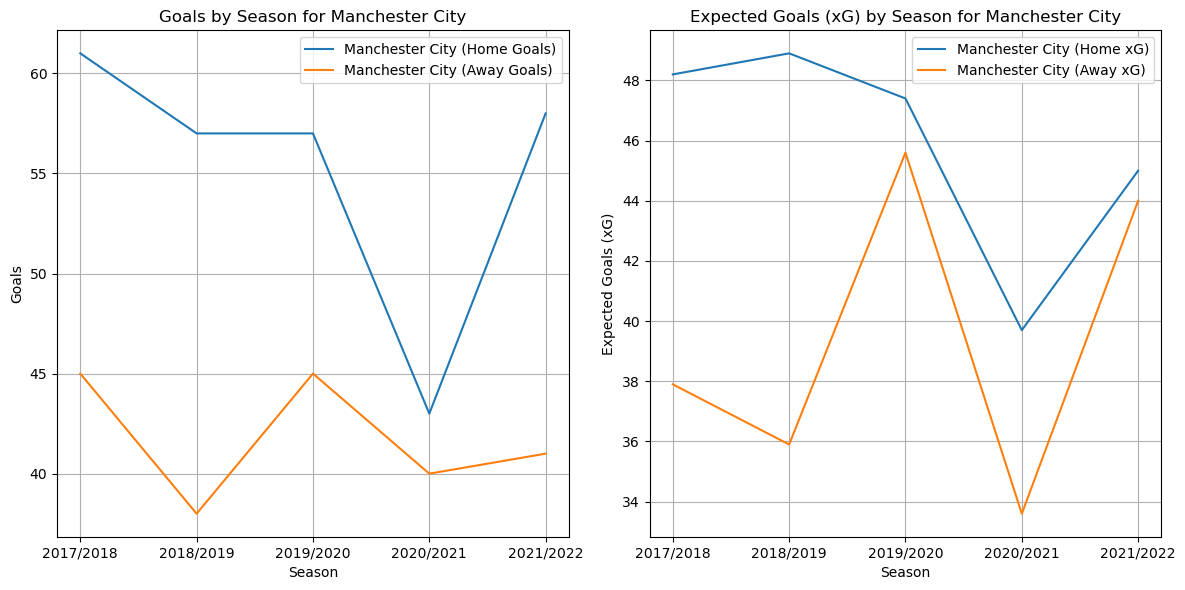

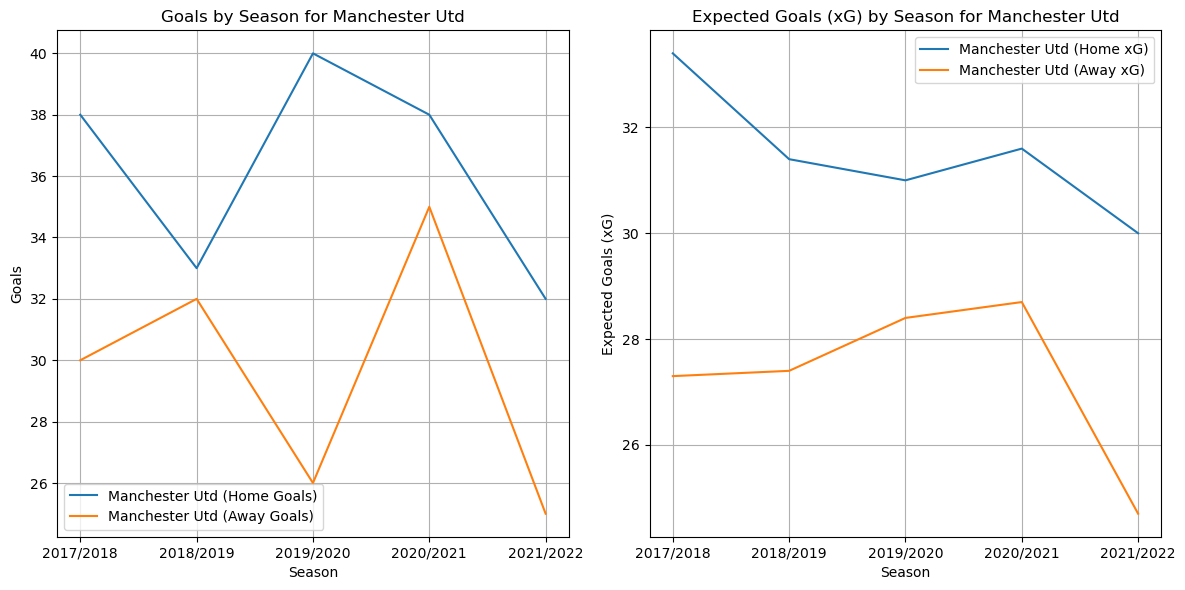

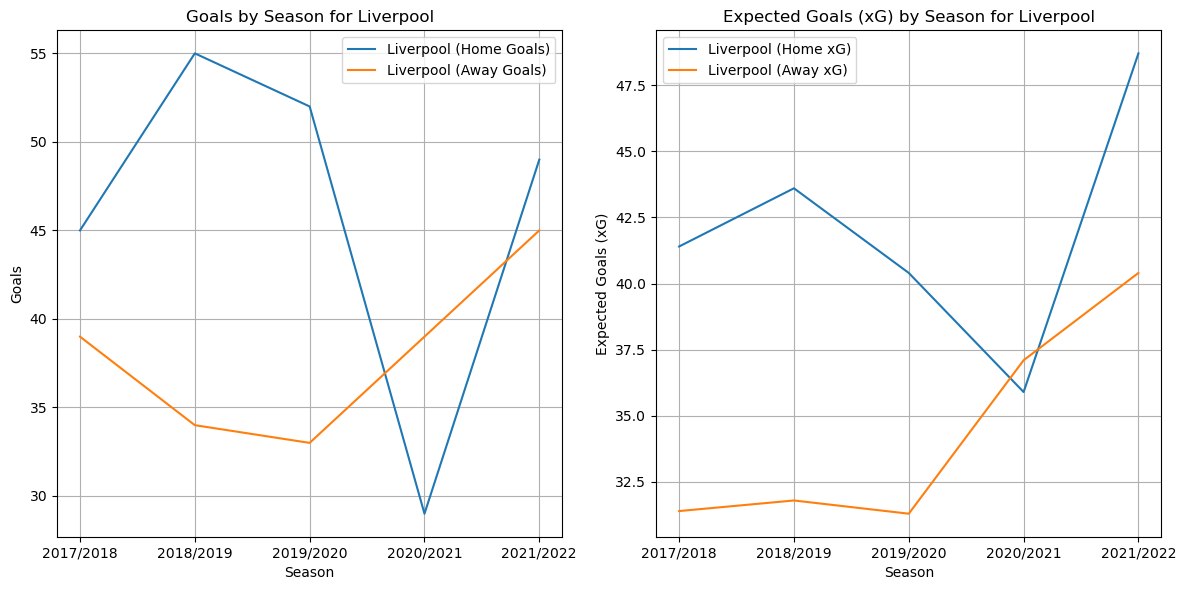

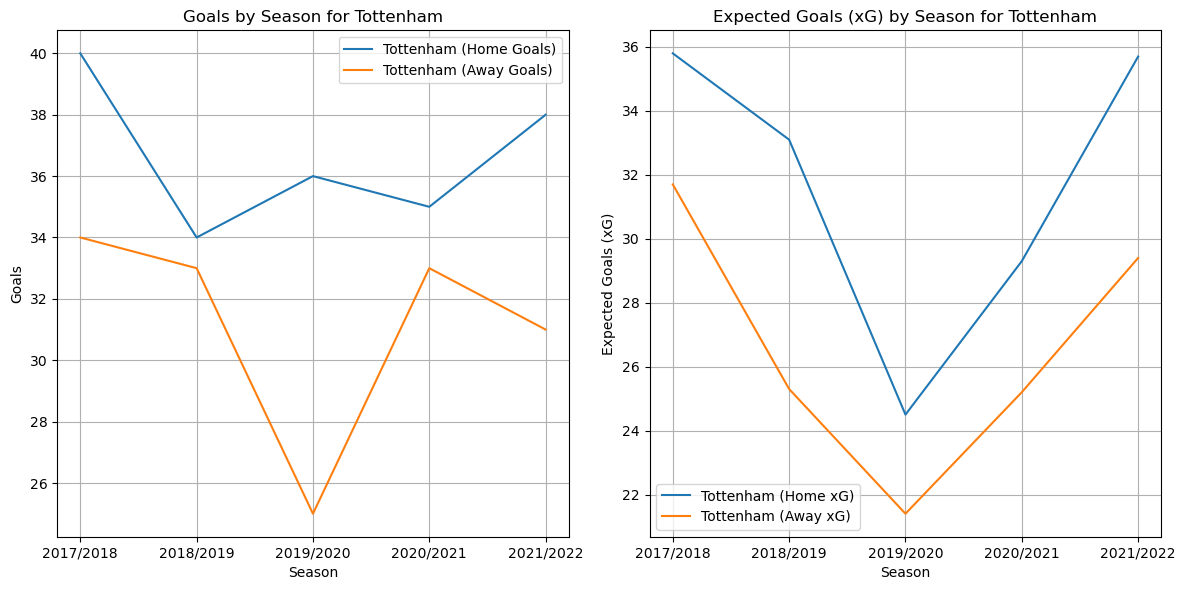

In [19]:
for team in teams_of_interest:
    plt.figure(figsize=(12, 6))

    # Plot goals by season for the team
    plt.subplot(1, 2, 1)
    plt.plot(team_home_goals.columns, team_home_goals.loc[team], label=f'{team} (Home Goals)')
    plt.plot(team_away_goals.columns, team_away_goals.loc[team], label=f'{team} (Away Goals)')
    #plt.plot(team_total_goals.columns, team_total_goals.loc[team], label=f'{team} (Total Goals)')

    plt.xlabel('Season')
    plt.ylabel('Goals')
    plt.title(f'Goals by Season for {team}')
    plt.legend()
    plt.grid(True)

    # Plot expected goals by season for the team
    plt.subplot(1, 2, 2)
    plt.plot(team_xp_home_goals.columns, team_xp_home_goals.loc[team], label=f'{team} (Home xG)')
    plt.plot(team_xp_away_goals.columns, team_xp_away_goals.loc[team], label=f'{team} (Away xG)')
    #plt.plot(team_xp_total_goals.columns, team_xp_total_goals.loc[team], label=f'{team} (Total xG)')

    plt.xlabel('Season')
    plt.ylabel('Expected Goals (xG)')
    plt.title(f'Expected Goals (xG) by Season for {team}')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

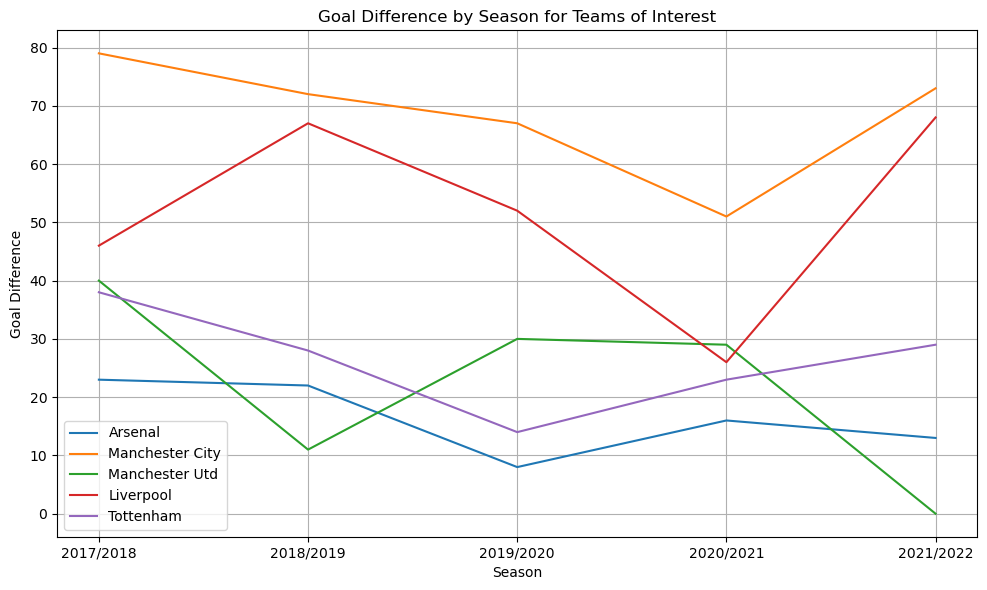

In [20]:
# Create a dataframe to store goal differences by season
goal_difference_df = pd.DataFrame()

for team in teams_of_interest:
    team_df = premier_df.copy()
    team_df['goal_diff'] = 0  # Initialize a new column for goal differences

    # Calculate goal differences for home matches
    team_df.loc[team_df['home'] == team, 'goal_diff'] = team_df['home_goals'] - team_df['away_goals']

    # Calculate goal differences for away matches
    team_df.loc[team_df['away'] == team, 'goal_diff'] = team_df['away_goals'] - team_df['home_goals']

    # Group by season and calculate the sum of goal differences for each season
    goal_difference_by_season = team_df.groupby('season')['goal_diff'].sum().reset_index()
    goal_difference_by_season.rename(columns={'goal_diff': team}, inplace=True)

    if goal_difference_df.empty:
        goal_difference_df = goal_difference_by_season
    else:
        goal_difference_df = pd.merge(goal_difference_df, goal_difference_by_season, on='season')

# Create a line plot for goal differences by season
plt.figure(figsize=(10, 6))

for team in teams_of_interest:
    plt.plot(goal_difference_df['season'], goal_difference_df[team], label=team)

plt.xlabel('Season')
plt.ylabel('Goal Difference')
plt.title('Goal Difference by Season for Teams of Interest')
plt.legend()
plt.xticks()
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

Now instead of comparing home and away goals we can compare same statistics by season fore actual and expected goals (home, away and total)

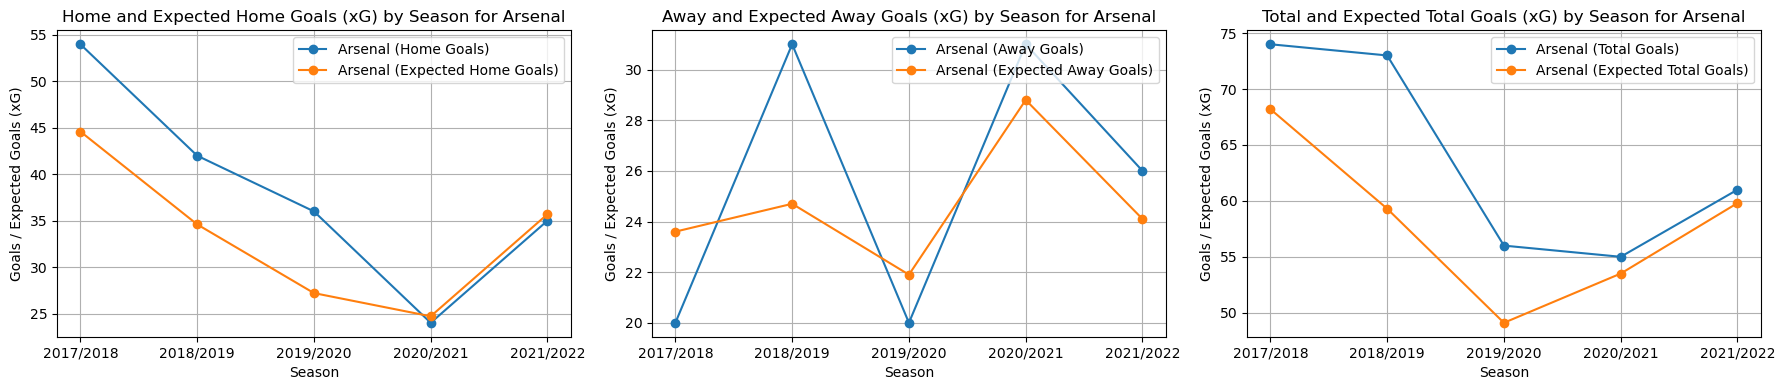

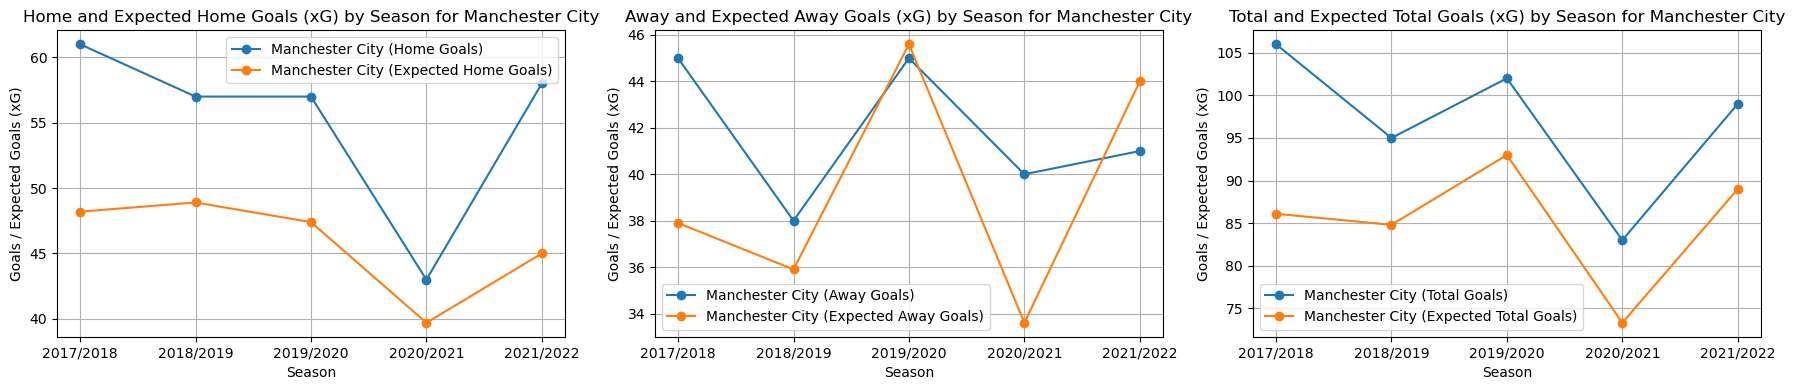

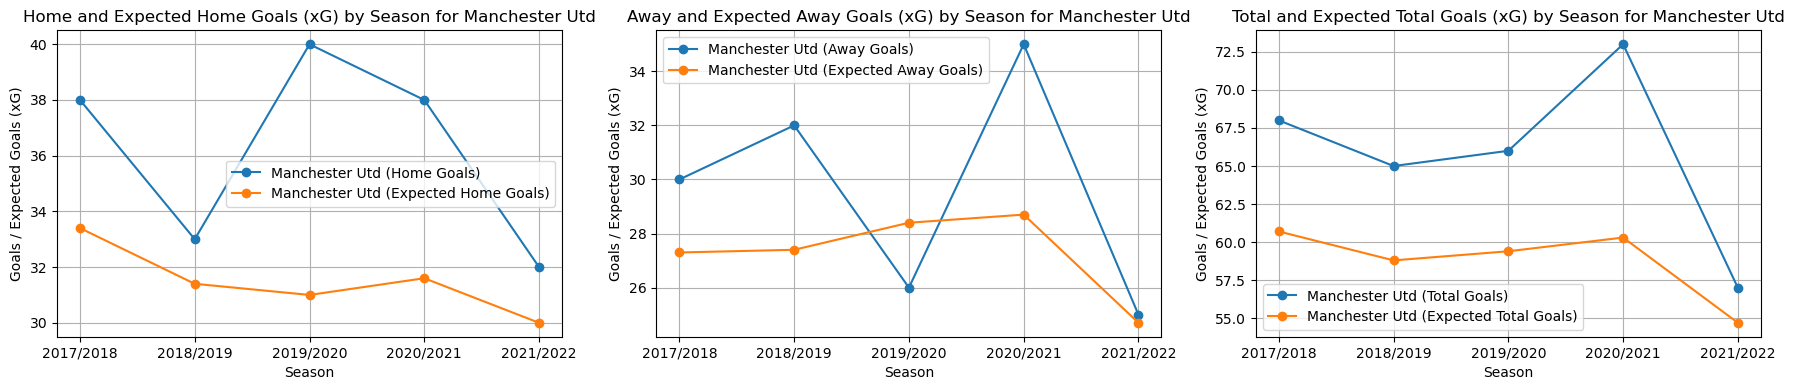

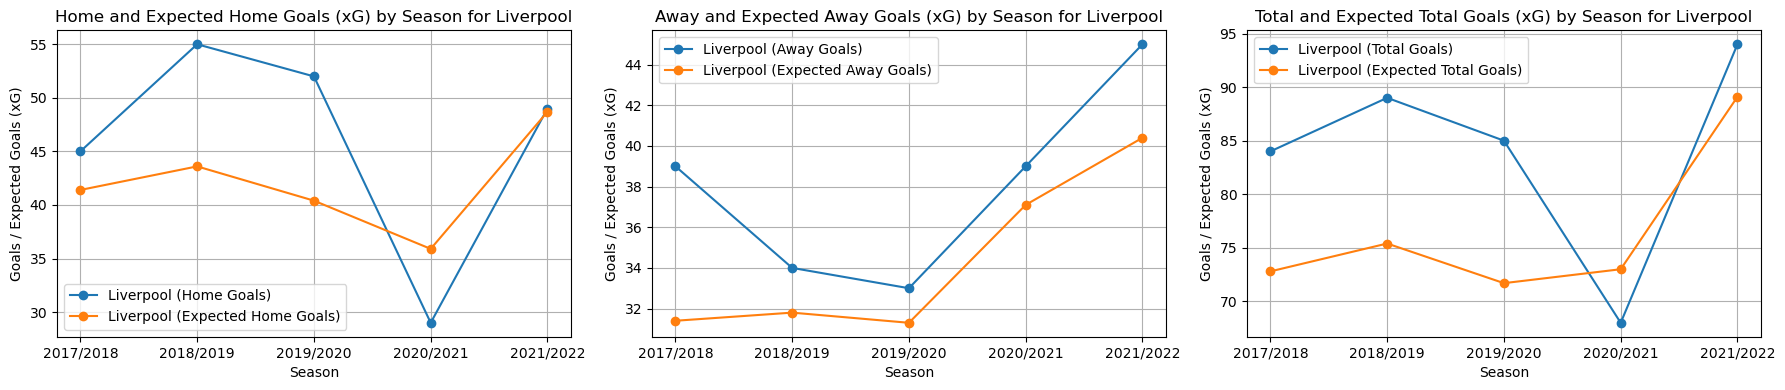

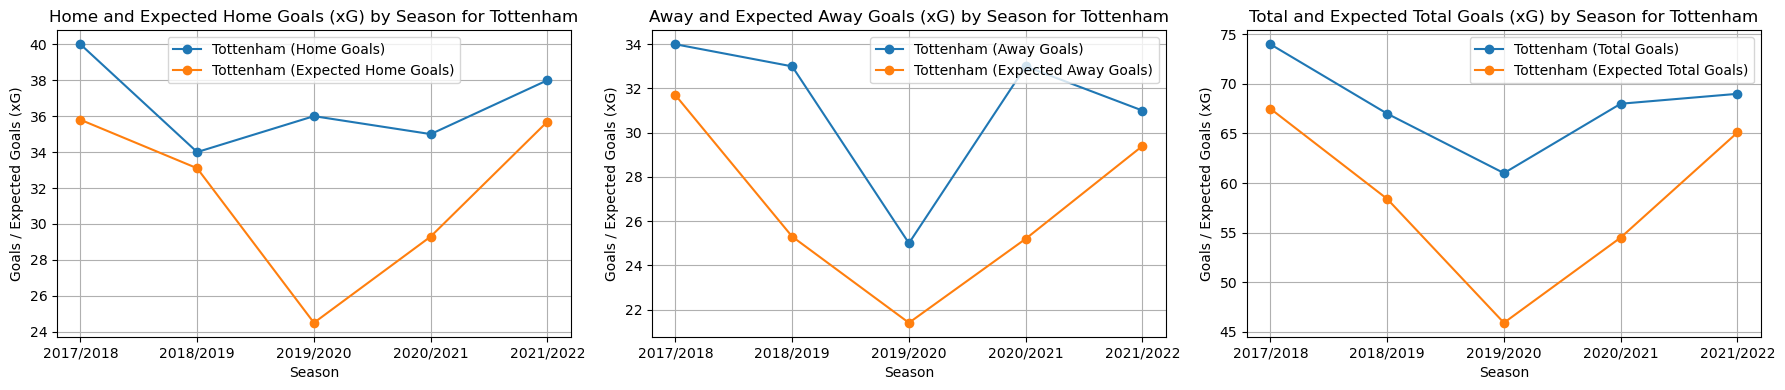

In [21]:
# Create separate plots for each team of interest for goals and corresponding expected goals
for team_of_interest in teams_of_interest:
    # Filter the DataFrame for matches where the team of interest played at home
    home_matches = premier_df[(premier_df['home'] == team_of_interest)]

    # Filter the DataFrame for matches where the team of interest played away
    away_matches = premier_df[(premier_df['away'] == team_of_interest)]

    # Concatenate home and away matches
    filtered_df = pd.concat([home_matches, away_matches])

    # Calculate home goals and expected home goals by season
    home_goals_by_season = home_matches.groupby(['season'])['home_goals'].sum()
    home_xg_by_season = home_matches.groupby(['season'])['xg_home'].sum()

    # Calculate away goals and expected away goals by season
    away_goals_by_season = away_matches.groupby(['season'])['away_goals'].sum()
    away_xg_by_season = away_matches.groupby(['season'])['xg_away'].sum()

    # Calculate total goals and expected total goals by season
    total_goals_by_season = home_goals_by_season.add(away_goals_by_season, fill_value=0)
    total_xg_by_season = home_xg_by_season.add(away_xg_by_season, fill_value=0)

    # Create a figure with three plots in the same row
    plt.figure(figsize=(18, 4))

    # Plot home and expected home goals by season
    plt.subplot(1, 3, 1)
    plt.plot(home_goals_by_season.index, home_goals_by_season.values, label=f'{team_of_interest} (Home Goals)', marker='o')
    plt.plot(home_xg_by_season.index, home_xg_by_season.values, label=f'{team_of_interest} (Expected Home Goals)', marker='o')

    plt.xlabel('Season')
    plt.ylabel('Goals / Expected Goals (xG)')
    plt.title(f'Home and Expected Home Goals (xG) by Season for {team_of_interest}')
    plt.legend()
    plt.grid(True)

    # Plot away and expected away goals by season
    plt.subplot(1, 3, 2)
    plt.plot(away_goals_by_season.index, away_goals_by_season.values, label=f'{team_of_interest} (Away Goals)', marker='o')
    plt.plot(away_xg_by_season.index, away_xg_by_season.values, label=f'{team_of_interest} (Expected Away Goals)', marker='o')

    plt.xlabel('Season')
    plt.ylabel('Goals / Expected Goals (xG)')
    plt.title(f'Away and Expected Away Goals (xG) by Season for {team_of_interest}')
    plt.legend()
    plt.grid(True)

    # Plot total and expected total goals by season
    plt.subplot(1, 3, 3)
    plt.plot(total_goals_by_season.index, total_goals_by_season.values, label=f'{team_of_interest} (Total Goals)', marker='o')
    plt.plot(total_xg_by_season.index, total_xg_by_season.values, label=f'{team_of_interest} (Expected Total Goals)', marker='o')

    plt.xlabel('Season')
    plt.ylabel('Goals / Expected Goals (xG)')
    plt.title(f'Total and Expected Total Goals (xG) by Season for {team_of_interest}')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

Below we create count plots for Arsenal and ManCity to count numbers of wins, losses and ties.

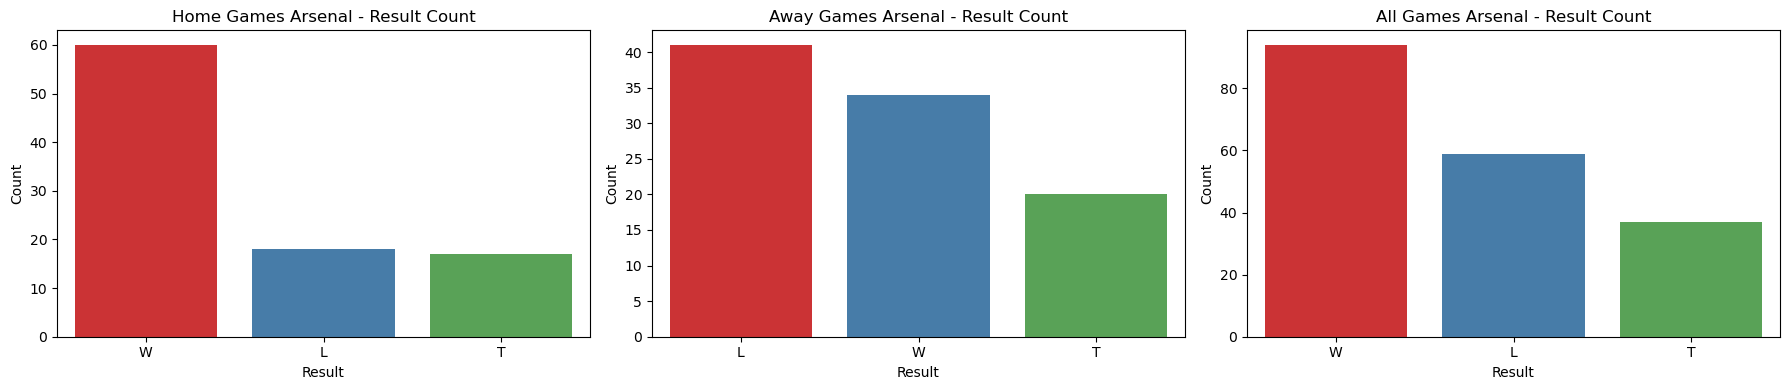

In [22]:
# Create a figure with three count plots in one row
plt.figure(figsize=(18, 4))

# Plot 1: Home Games
plt.subplot(1, 3, 1)
sns.countplot(x=arsenal_home_df["result"], order=arsenal_home_df['result'].value_counts(ascending=False).index, palette="Set1")
plt.xlabel('Result')
plt.ylabel('Count')
plt.title('Home Games Arsenal - Result Count')

# Plot 2: Away Games
plt.subplot(1, 3, 2)
sns.countplot(x=arsenal_away_df["result"], order=arsenal_away_df['result'].value_counts(ascending=False).index, palette="Set1")
plt.xlabel('Result')
plt.ylabel('Count')
plt.title('Away Games Arsenal - Result Count')

# Plot 3: Total Games (Home + Away)
plt.subplot(1, 3, 3)
sns.countplot(x=arsenal["result"], order=arsenal['result'].value_counts(ascending=False).index, palette="Set1")
plt.xlabel('Result')
plt.ylabel('Count')
plt.title('All Games Arsenal - Result Count')
plt.tight_layout()
plt.show()

Let's do the same for Manchester City!

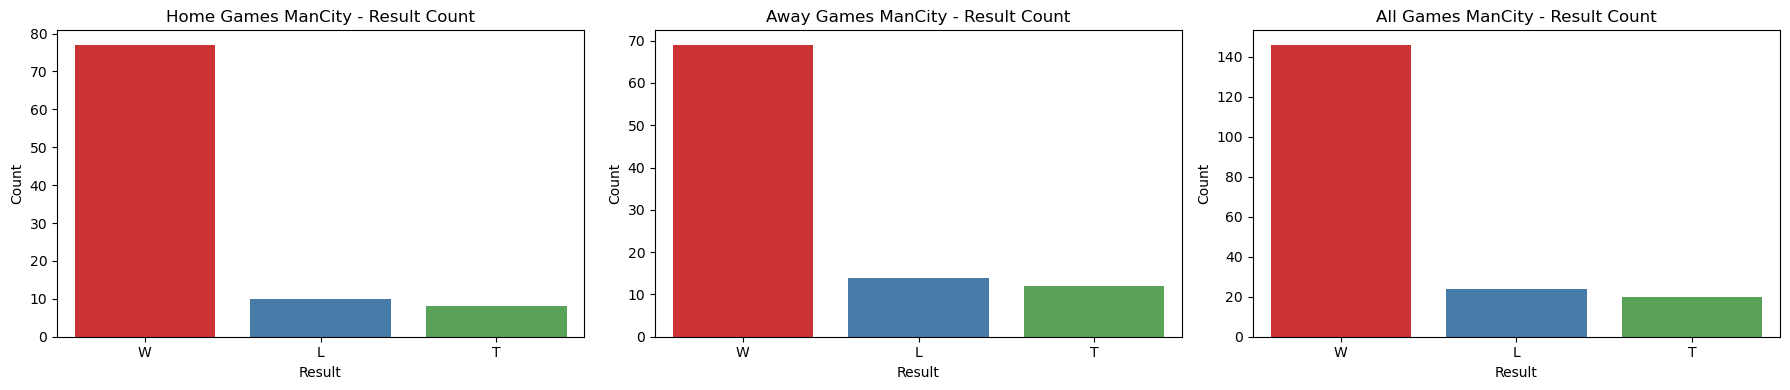

In [23]:
# Create a figure with three count plots in one row
plt.figure(figsize=(18, 4))

# Plot 1: Home Games
plt.subplot(1, 3, 1)
sns.countplot(x = mc_home_df["result"], order=mc_home_df['result'].value_counts(ascending=False).index, palette = "Set1")
plt.xlabel('Result')
plt.ylabel('Count')
plt.title('Home Games ManCity - Result Count')

# Plot 2: Away Games
plt.subplot(1, 3, 2)
sns.countplot(x = mc_away_df["result"], order=mc_away_df['result'].value_counts(ascending=False).index, palette = "Set1")
plt.xlabel('Result')
plt.ylabel('Count')
plt.title('Away Games ManCity - Result Count')

# Plot 3: Total Games (Home + Away)
plt.subplot(1, 3, 3)
sns.countplot(x = mc["result"], order=mc['result'].value_counts(ascending=False).index, palette = "Set1")
plt.xlabel('Result')
plt.ylabel('Count')
plt.title('All Games ManCity - Result Count')
plt.tight_layout()
plt.show()

**We can notice that Manchester City is pretty consistent with their statistics home and away when Arsenal strongly depends on where they are playing. We see that not only they just lose more often away but they lose more often than win while away, when at home the picture is the opposite.**

Here are some plots for referees (in general and then concerning Arsenal and Man City)

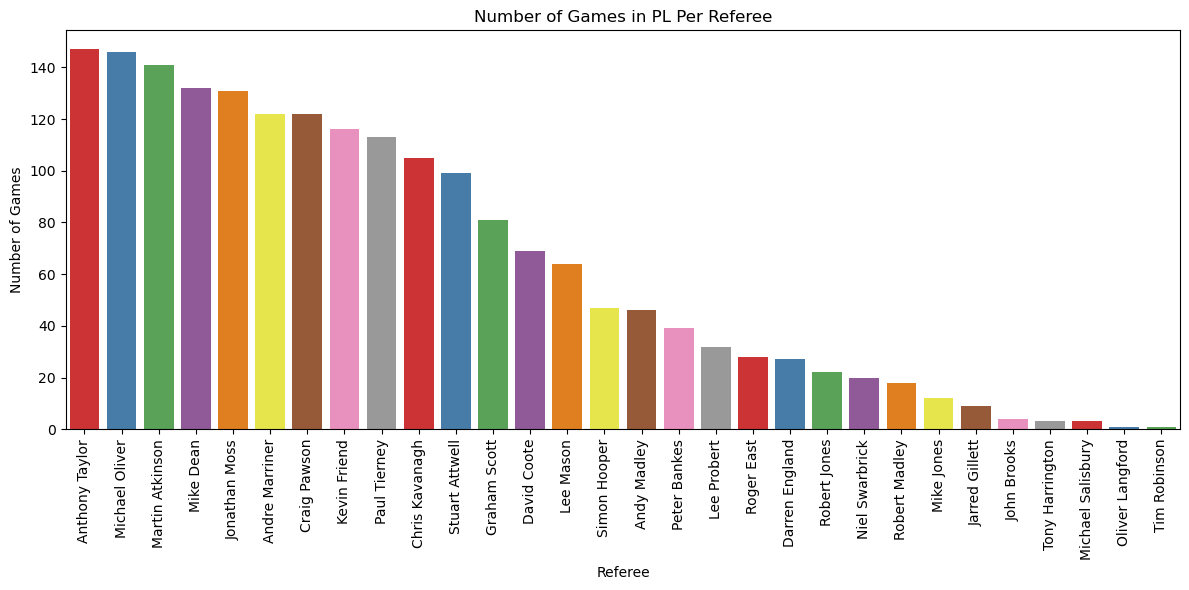

In [24]:
# Create a count plot for the entire league for the number of games per referee
plt.figure(figsize=(12, 6))
sns.countplot(x='referee', data=premier_df, order=premier_df['referee'].value_counts(ascending=False).index, palette='Set1')
plt.xlabel('Referee')
plt.ylabel('Number of Games')
plt.title('Number of Games in PL Per Referee')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

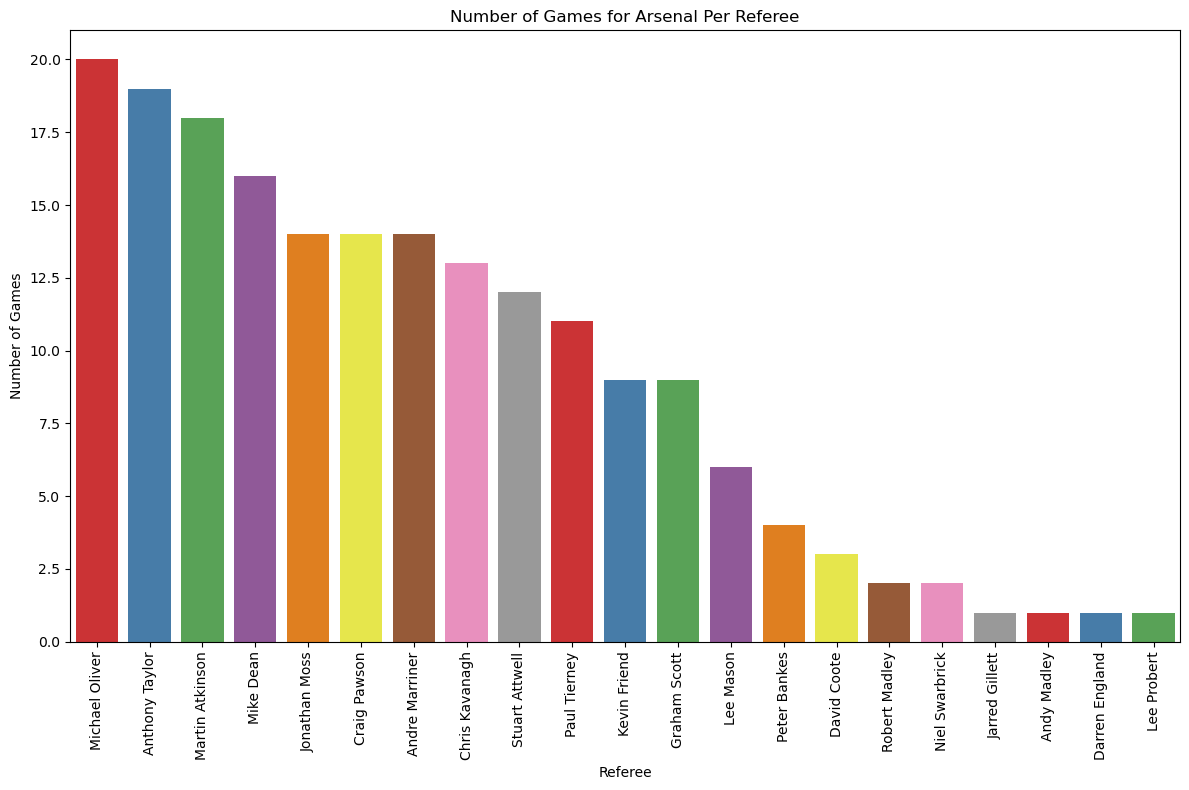

In [25]:
plt.figure(figsize=(12, 8))
fig = sns.countplot(x = arsenal["referee"], order=arsenal["referee"].value_counts(ascending=False).index, palette='Set1')
fig.set_xticklabels(fig.get_xticklabels(), rotation=90)
plt.xlabel('Referee')
plt.ylabel('Number of Games')
plt.title('Number of Games for Arsenal Per Referee')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

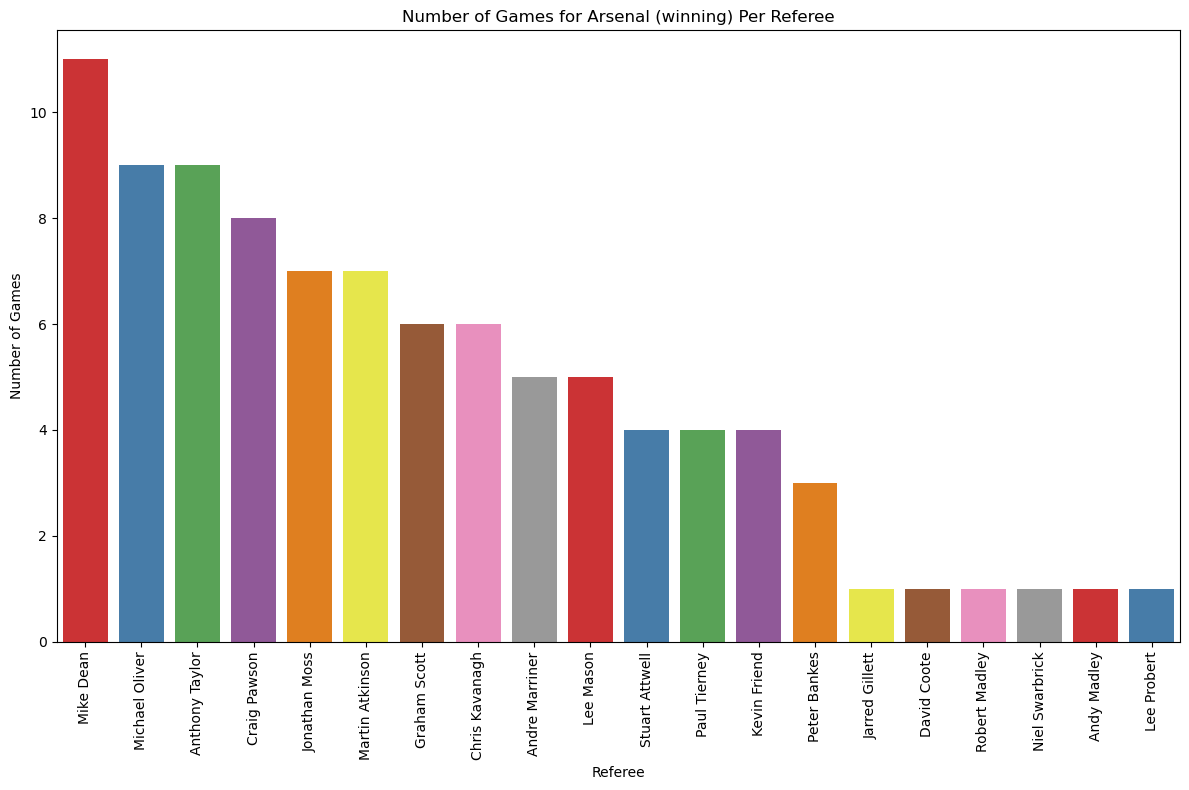

In [26]:
plt.figure(figsize=(12, 8))
fig = sns.countplot(x = arsenal[arsenal["result"] == "W"]["referee"], order=arsenal[arsenal["result"] == "W"]["referee"].value_counts(ascending=False).index, palette='Set1')
fig.set_xticklabels(fig.get_xticklabels(), rotation=90)
plt.xlabel('Referee')
plt.ylabel('Number of Games')
plt.title('Number of Games for Arsenal (winning) Per Referee')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

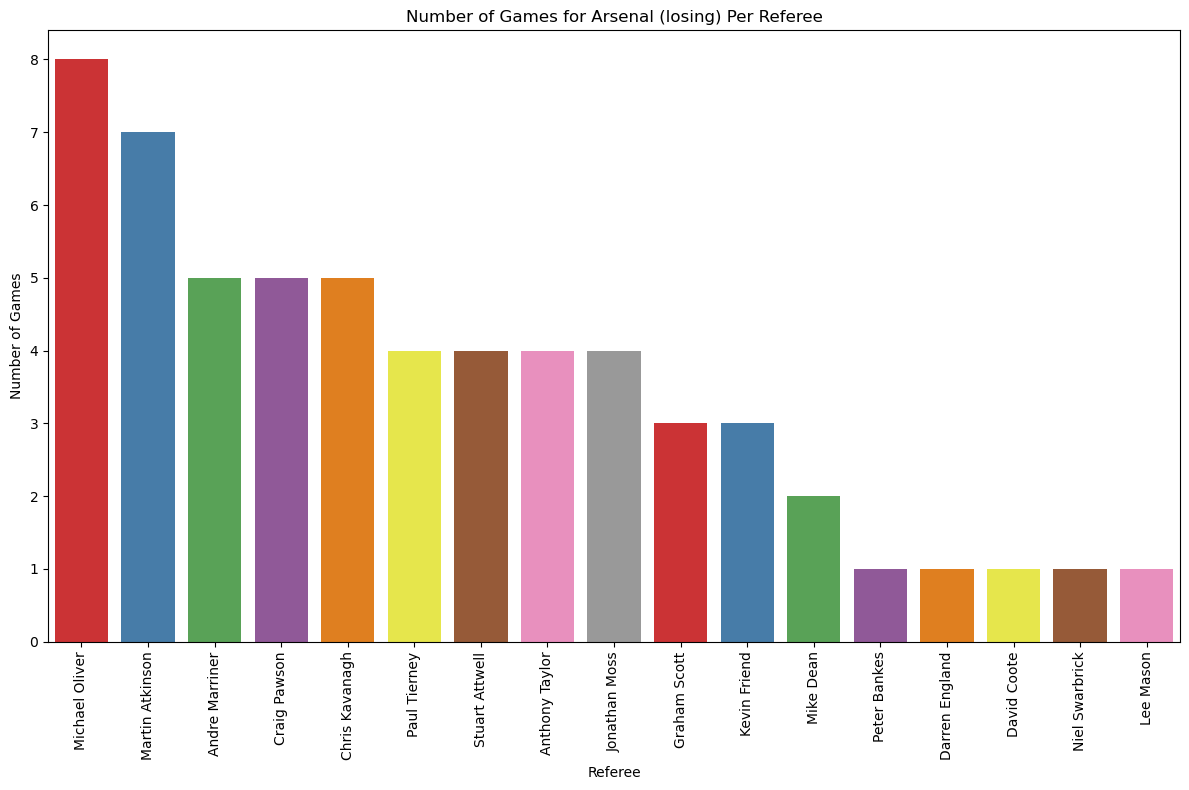

In [27]:
plt.figure(figsize=(12, 8))
fig = sns.countplot(x = arsenal[arsenal["result"] == "L"]["referee"], order=arsenal[arsenal["result"] == "L"]["referee"].value_counts(ascending=False).index, palette='Set1')
fig.set_xticklabels(fig.get_xticklabels(), rotation=90)
plt.xlabel('Referee')
plt.ylabel('Number of Games')
plt.title('Number of Games for Arsenal (losing) Per Referee')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

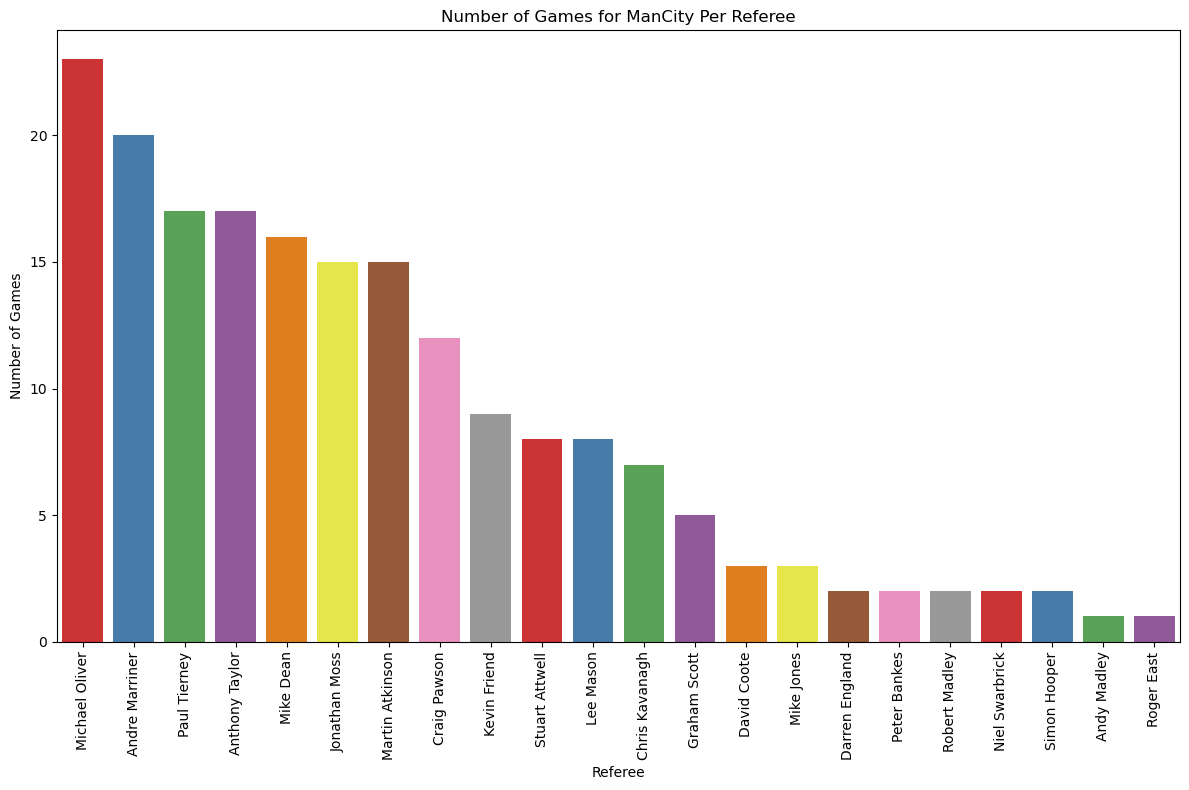

In [28]:
plt.figure(figsize=(12, 8))
fig = sns.countplot(x = mc["referee"], order=mc["referee"].value_counts(ascending=False).index, palette='Set1')
fig.set_xticklabels(fig.get_xticklabels(), rotation=90)
plt.xlabel('Referee')
plt.ylabel('Number of Games')
plt.title('Number of Games for ManCity Per Referee')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

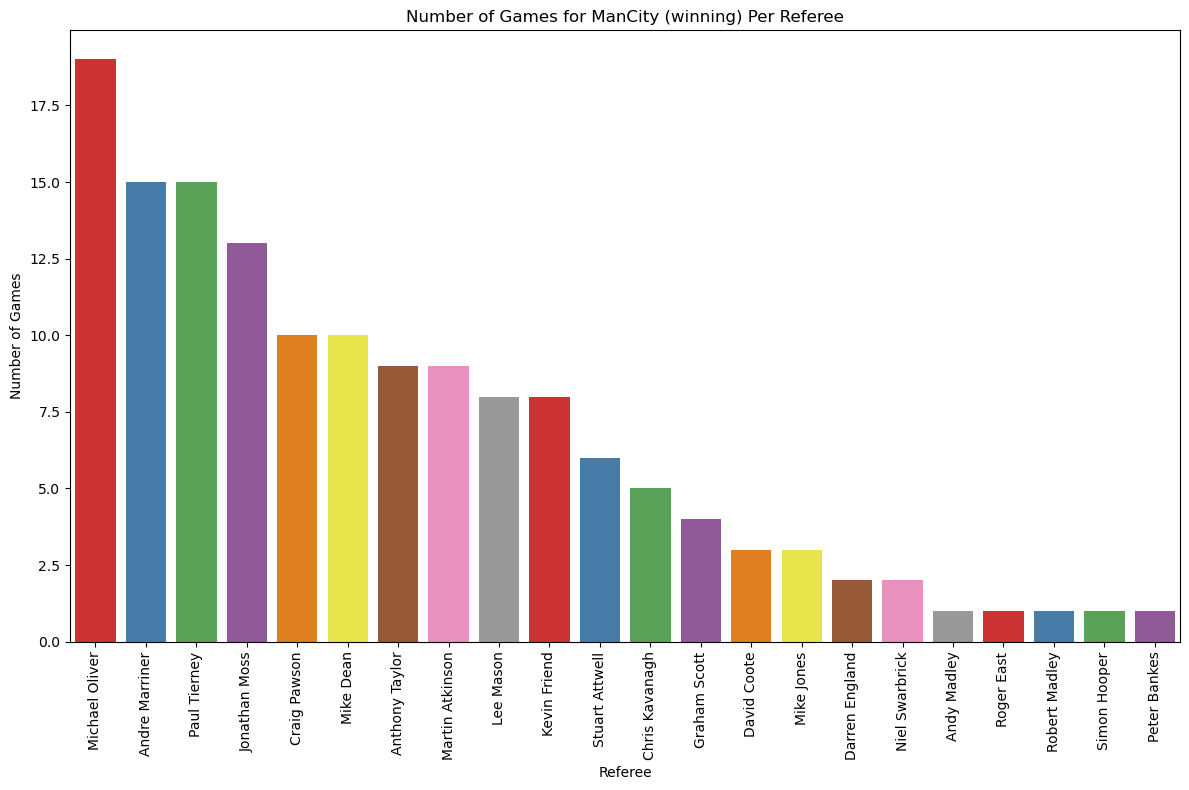

In [29]:
plt.figure(figsize=(12, 8))
fig = sns.countplot(x = mc[mc["result"] == "W"]["referee"], order=mc[mc["result"] == "W"]["referee"].value_counts(ascending=False).index, palette='Set1')
fig.set_xticklabels(fig.get_xticklabels(), rotation=90)
plt.xlabel('Referee')
plt.ylabel('Number of Games')
plt.title('Number of Games for ManCity (winning) Per Referee')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

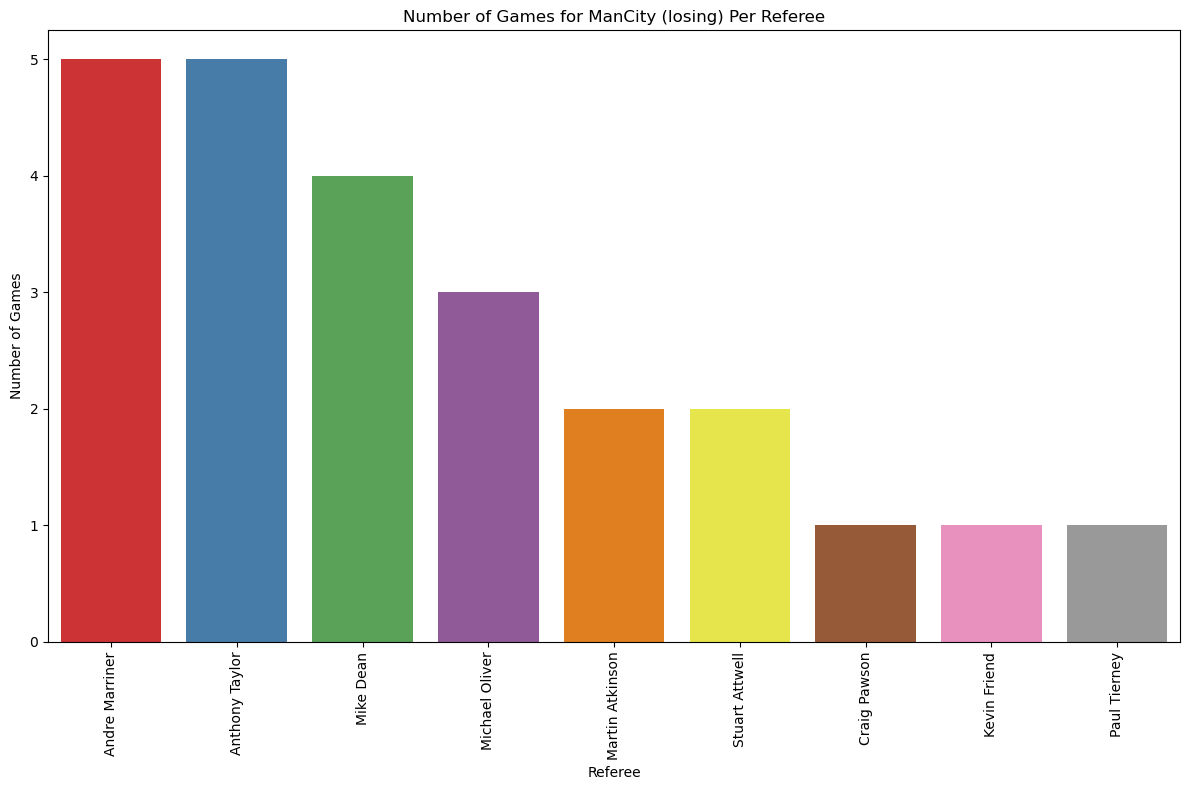

In [30]:
plt.figure(figsize=(12, 8))
fig = sns.countplot(x = mc[mc["result"] == "L"]["referee"], order=mc[mc["result"] == "L"]["referee"].value_counts(ascending=False).index, palette='Set1')
fig.set_xticklabels(fig.get_xticklabels(), rotation=90)
plt.xlabel('Referee')
plt.ylabel('Number of Games')
plt.title('Number of Games for ManCity (losing) Per Referee')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Correlation Analysis

First I calculate correlations between expected goals and actual goals (separately for home goals and away goals and total number of goals in the game). This could give us insight into how well teams are converting their chances, and how good of a predictor the number of expected goals is. I do it for the entire table but we could calculate these correlations for each team of interest separately to get insight into how well a certain team is converting their chances, and whether they are overperforming or underperforming relative to their expected result.

In [31]:
import scipy.stats as stats
# Calculate the correlation coefficient (r) and p-value for home matches
r_home, p_value_home = stats.pearsonr(premier_df['xg_home'], premier_df['home_goals'])

# Calculate the correlation coefficient (r) and p-value for away matches
r_away, p_value_away = stats.pearsonr(premier_df['xg_away'], premier_df['away_goals'])

# Calculate the correlation coefficient (r) and p-value for total goals in a game
total_goals = premier_df['home_goals'] + premier_df['away_goals']
r_total, p_value_total = stats.pearsonr(premier_df['xg_home'] + premier_df['xg_away'], total_goals)

# Print the correlation coefficients and p-values for home and away matches, and total goals
print(f'Correlation for Home Matches (r): {r_home}')
print(f'P-value for Home Matches: {p_value_home}')
print(f'Correlation for Away Matches (r): {r_away}')
print(f'P-value for Away Matches: {p_value_away}')
print(f'Correlation for Total Goals (r): {r_total}')
print(f'P-value for Total Goals: {p_value_total}')

# Set significance level
alpha = 0.01

# Check for statistical significance for home matches
if p_value_home < alpha:
    print("For Home Matches: Reject the null hypothesis. There is a statistically significant correlation.")
else:
    print("For Home Matches: Fail to reject the null hypothesis. There is no statistically significant correlation.")

# Check for statistical significance for away matches
if p_value_away < alpha:
    print("For Away Matches: Reject the null hypothesis. There is a statistically significant correlation.")
else:
    print("For Away Matches: Fail to reject the null hypothesis. There is no statistically significant correlation.")

# Check for statistical significance for total goals
if p_value_total < alpha:
    print("For Total Goals: Reject the null hypothesis. There is a statistically significant correlation.")
else:
    print("For Total Goals: Fail to reject the null hypothesis. There is no statistically significant correlation.")

Correlation for Home Matches (r): 0.6260799533854157
P-value for Home Matches: 2.5494305963597928e-207
Correlation for Away Matches (r): 0.6326236989802007
P-value for Away Matches: 6.034231472732211e-213
Correlation for Total Goals (r): 0.5378907079403054
P-value for Total Goals: 5.840855212164618e-143
For Home Matches: Reject the null hypothesis. There is a statistically significant correlation.
For Away Matches: Reject the null hypothesis. There is a statistically significant correlation.
For Total Goals: Reject the null hypothesis. There is a statistically significant correlation.


Both for home and away matches we got moderate positive correlation of around 0.63, which means that as expected goals increase, actual goals tend to increase as well. This means that, on average, teams that are expected to score more goals do tend to score more goals in reality. It suggests that expected goals can be a useful predictor of actual goals in football matches. However, it's not a perfect predictor, as there is still some variability in actual goal-scoring that is not accounted for by expected goals alone. It provides a good estimate of a team's scoring potential but doesn't consider all factors that can influence actual goal-scoring, such as the skill of the opposing team, individual player performance, and game-specific conditions. We checked also that these correlations are statistically significant based on our dataset, which indicates a real relationship between expected and actual goals.

For the total number of goals in the game we also got moderate positive correlation of around 0.54, so the analysis is similar but it's just a bit weaker predictor for the total number of goals.

In [32]:
correlations_diff = {}
df = premier_df
# Loop through each team and calculate the correlation between goals scored and goal differences
for team in teams_of_interest:
    # Create a mask to filter matches where the team played as either home or away
    home_mask = df['home'] == team
    away_mask = df['away'] == team
    
    # Calculate the team's differences based on goals scored
    df.loc[home_mask, 'goal_diff'] = df.loc[home_mask, 'home_goals'] - df.loc[home_mask, 'away_goals']
    df.loc[away_mask, 'goal_diff'] = df.loc[away_mask, 'away_goals'] - df.loc[away_mask, 'home_goals']
    
    # Calculate the correlation between goals scored and goal differences for the team
    correlation = df[home_mask | away_mask]['goal_diff'].corr(df[home_mask | away_mask]['home_goals'] + df[home_mask | away_mask]['away_goals'])
    
    # Store the correlation in the dictionary
    correlations_diff[team] = correlation

# Print the correlations for each team
for team, correlation in correlations_diff.items():
    print(f'Correlation between Goals and Goal Difference for {team}: {correlation}')

Correlation between Goals and Goal Difference for Arsenal: 0.1993655813425189
Correlation between Goals and Goal Difference for Manchester City: 0.5121239790430725
Correlation between Goals and Goal Difference for Manchester Utd: 0.23260364581920479
Correlation between Goals and Goal Difference for Liverpool: 0.27018549707483314
Correlation between Goals and Goal Difference for Tottenham: 0.315969225427544


Among the teams of interest we can notice that only ManCity has a moderate positive correlation of around 0.51 between goals scored by them and the goal difference, which means that as the number of goals scored increases the difference also tends to increase and positive difference means a victory. So we see, even though the correlation of 0.51 doesn't mean a perfect predictor, ManCity tends to realize their chances much more consistently than other teams who have weaker correlations between goal differences and goals scored. The goal differences of other teams might not be as strongly determined by goal-scoring alone and other factors should be taken into account.

Below I also check correlations between scored goals and the number of points got by a team and also a result encoded as positive (+1 for a win), negative (-1 for a loss) and neutral (0 for a tie). All correlations are weak so I don't do anything else about them. Correlation is about linear relationship so maybe there are other ways to encode results of the game, but I used the ones that seemed only logical to me. 

In [33]:
correlations_res = {}
df = premier_df
for team in teams_of_interest:
    # Create a mask to filter matches where the team played as either home or away
    home_mask = df['home'] == team
    away_mask = df['away'] == team
    
    # Calculate team's goal differences in the match
    df.loc[home_mask, 'result'] = df.loc[home_mask, 'home_goals'] - df.loc[home_mask, 'away_goals']
    df.loc[away_mask, 'result'] = df.loc[away_mask, 'away_goals'] - df.loc[away_mask, 'home_goals']
    
    # Determine the match result for the team (win = 3, loss = 0, tie = 1)
    df['result'] = df['result'].apply(lambda x: 3 if x > 0 else (0 if x < 0 else 1))
    
    # Calculate the correlation between goals scored and match results for the team
    correlation = df[home_mask | away_mask]['result'].corr(df[home_mask | away_mask]['home_goals'] + df[home_mask | away_mask]['away_goals'])
    
    # Store the correlation in the dictionary
    correlations_res[team] = correlation

# Print the correlations for each team
for team, correlation in correlations_res.items():
    print(f'Correlation between Goals and Result (points) for {team}: {correlation}')

Correlation between Goals and Result (points) for Arsenal: 0.16194051845389512
Correlation between Goals and Result (points) for Manchester City: 0.11775911275715965
Correlation between Goals and Result (points) for Manchester Utd: 0.2000399792016333
Correlation between Goals and Result (points) for Liverpool: 0.20336523423160452
Correlation between Goals and Result (points) for Tottenham: 0.19993285353676882


In [34]:
correlations_result = {}
df = premier_df
for team in teams_of_interest:
    # Create a mask to filter matches where the team played as either home or away
    home_mask = df['home'] == team
    away_mask = df['away'] == team
    
    # Calculate team's goal differences in the match
    df.loc[home_mask, 'result'] = df.loc[home_mask, 'home_goals'] - df.loc[home_mask, 'away_goals']
    df.loc[away_mask, 'result'] = df.loc[away_mask, 'away_goals'] - df.loc[away_mask, 'home_goals']
    
    # Determine the match result for the team (win = 1, loss = -1, tie = 0)
    df['result'] = df['result'].apply(lambda x: 1 if x > 0 else (-1 if x < 0 else 0))
    
    # Calculate the correlation between goals scored and match results for the team
    correlation = df[home_mask | away_mask]['result'].corr(df[home_mask | away_mask]['home_goals'] + df[home_mask | away_mask]['away_goals'])
    
    # Store the correlation in the dictionary
    correlations_result[team] = correlation

# Print the correlations for each team
for team, correlation in correlations_result.items():
    print(f'Correlation between Goals and Result (points) for {team}: {correlation}')

Correlation between Goals and Result (points) for Arsenal: 0.13542548208642116
Correlation between Goals and Result (points) for Manchester City: 0.08762048133450209
Correlation between Goals and Result (points) for Manchester Utd: 0.15976663580564482
Correlation between Goals and Result (points) for Liverpool: 0.17318441377610122
Correlation between Goals and Result (points) for Tottenham: 0.17902613844640486


### Hypotheses testing

One of the type of hypotheses that seem to be valuable to me is **how accurate is the prediction of the number of goals or goal difference** for home and away teams, and to check it over each club of interest (we could test consistently high performing teams and also low performing teams), **the number of wins and losses** as well, we also can check **if the prediction improved** over the time comparing them by season. We also can **compare** numbers of goals scored and missed **with the average** for high performing and low performing teams. I will also check **home advantage hypothesis** for Arsenal and ManCity as we saw from visualizations that it seems like ManCity is consistent in both environments when Arsenal is struggling away from home.

In [35]:
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel

In [36]:
print("Arsenal home expected: ", arsenal_home_df["xg_home"].mean())
print("Arsenal home actual: ", arsenal_home_df["home_goals"].mean())
print("Arsenal home expected (lost): ", arsenal_home_df[arsenal_home_df["result"] == "L"]["xg_home"].mean())
print("Arsenal home actual(lost): ", arsenal_home_df[arsenal_home_df["result"] == "L"]["home_goals"].mean())
print("Arsenal home expected (win): ", arsenal_home_df[arsenal_home_df["result"] == "W"]["xg_home"].mean())
print("Arsenal home actual(win): ", arsenal_home_df[arsenal_home_df["result"] == "W"]["home_goals"].mean())
print("Arsenal home expected (tie): ", arsenal_home_df[arsenal_home_df["result"] == "T"]["xg_home"].mean())
print("Arsenal home actual(tie): ", arsenal_home_df[arsenal_home_df["result"] == "T"]["home_goals"].mean())

Arsenal home expected:  1.7557894736842106
Arsenal home actual:  2.0105263157894737
Arsenal home expected (lost):  1.0722222222222222
Arsenal home actual(lost):  0.4444444444444444
Arsenal home expected (win):  2.03
Arsenal home actual(win):  2.7
Arsenal home expected (tie):  1.5117647058823531
Arsenal home actual(tie):  1.2352941176470589


In [37]:
print("Arsenal away expected: ", arsenal_away_df["xg_away"].mean())
print("Arsenal away actual: ", arsenal_away_df["away_goals"].mean())
print("Arsenal away expected (lost): ", arsenal_away_df[arsenal_away_df["result"] == "L"]["xg_away"].mean())
print("Arsenal away actual(lost): ", arsenal_away_df[arsenal_away_df["result"] == "L"]["away_goals"].mean())
print("Arsenal away expected (win): ", arsenal_away_df[arsenal_away_df["result"] == "W"]["xg_away"].mean())
print("Arsenal away actual(win): ", arsenal_away_df[arsenal_away_df["result"] == "W"]["away_goals"].mean())
print("Arsenal away expected (tie): ", arsenal_away_df[arsenal_away_df["result"] == "T"]["xg_away"].mean())
print("Arsenal away actual(tie): ", arsenal_away_df[arsenal_away_df["result"] == "T"]["away_goals"].mean())

Arsenal away expected:  1.2957894736842106
Arsenal away actual:  1.3473684210526315
Arsenal away expected (lost):  0.9365853658536585
Arsenal away actual(lost):  0.5853658536585366
Arsenal away expected (win):  1.7529411764705882
Arsenal away actual(win):  2.4411764705882355
Arsenal away expected (tie):  1.255
Arsenal away actual(tie):  1.05


In [38]:
print("ManCity home expected: ", mc_home_df["xg_home"].mean())
print("ManCity home actual: ", mc_home_df["home_goals"].mean())
print("ManCity home expected (lost): ", mc_home_df[mc_home_df["result"] == "L"]["xg_home"].mean())
print("ManCity home actual(lost): ", mc_home_df[mc_home_df["result"] == "L"]["home_goals"].mean())
print("ManCity home expected (win): ", mc_home_df[mc_home_df["result"] == "W"]["xg_home"].mean())
print("ManCity home actual(win): ", mc_home_df[mc_home_df["result"] == "W"]["home_goals"].mean())
print("ManCity home expected (tie): ", mc_home_df[mc_home_df["result"] == "T"]["xg_home"].mean())
print("ManCity home actual(tie): ", mc_home_df[mc_home_df["result"] == "T"]["home_goals"].mean())

ManCity home expected:  2.4126315789473685
ManCity home actual:  2.905263157894737
ManCity home expected (lost):  1.8
ManCity home actual(lost):  1.1
ManCity home expected (win):  2.5636363636363635
ManCity home actual(win):  3.324675324675325
ManCity home expected (tie):  1.725
ManCity home actual(tie):  1.125


In [39]:
print("ManCity away expected: ", mc_away_df["xg_away"].mean())
print("ManCity away actual: ", mc_away_df["away_goals"].mean())
print("ManCity away expected (lost): ", mc_away_df[mc_away_df["result"] == "L"]["xg_away"].mean())
print("ManCity away actual(lost): ", mc_away_df[mc_away_df["result"] == "L"]["away_goals"].mean())
print("ManCity away expected (win): ", mc_away_df[mc_away_df["result"] == "W"]["xg_away"].mean())
print("ManCity away actual(win): ", mc_away_df[mc_away_df["result"] == "W"]["away_goals"].mean())
print("ManCity away expected (tie): ", mc_away_df[mc_away_df["result"] == "T"]["xg_away"].mean())
print("ManCity away actual(tie): ", mc_away_df[mc_away_df["result"] == "T"]["away_goals"].mean())

ManCity away expected:  2.0736842105263156
ManCity away actual:  2.2
ManCity away expected (lost):  1.5214285714285716
ManCity away actual(lost):  0.9285714285714286
ManCity away expected (win):  2.247826086956522
ManCity away actual(win):  2.681159420289855
ManCity away expected (tie):  1.7166666666666666
ManCity away actual(tie):  0.9166666666666666


In [40]:
alpha = 0.05
# Loop through each team of interest (I do all teams here in alphabetical order just to maybe see something interesting)
for team in np.sort(premier_df["home"].unique()):
    # Filter dataframe for the current team as the home team
    home_team_df = premier_df[premier_df["home"] == team]

    # Perform a t-test for home goals vs. expected home goals
    t_stat_home, p_value_home = stats.ttest_rel(home_team_df["home_goals"], home_team_df["xg_home"])

    # Calculate statistics
    avg_home_goals = home_team_df["home_goals"].mean()
    avg_xg_home = home_team_df["xg_home"].mean()

    # Print results and statistics for the current team
    print(f"Team: {team}")
    print(f"Average Home Goals: {avg_home_goals:.2f}")
    print(f"Average Expected Home Goals (xG): {avg_xg_home:.2f}")
    print(f"T-Test for Home Goals vs. Expected Home Goals:")
    print(f"T-statistic: {t_stat_home:.2f}")
    print(f"P-value: {p_value_home:.4f}")
    if p_value_home < alpha:
        print("Result: Significant difference between observed and expected home goals.")
    else:
        print("Result: No significant difference between observed and expected home goals.")

    # Filter dataframe for the current team as the away team
    away_team_df = premier_df[premier_df["away"] == team]

    # Perform a t-test for away goals vs. expected away goals
    t_stat_away, p_value_away = stats.ttest_rel(away_team_df["away_goals"], away_team_df["xg_away"])

    # Calculate statistics
    avg_away_goals = away_team_df["away_goals"].mean()
    avg_xg_away = away_team_df["xg_away"].mean()

    # Print results and statistics for the current team
    print(f"\nAverage Away Goals: {avg_away_goals:.2f}")
    print(f"Average Expected Away Goals (xG): {avg_xg_away:.2f}")
    print(f"T-Test for Away Goals vs. Expected Away Goals:")
    print(f"T-statistic: {t_stat_away:.2f}")
    print(f"P-value: {p_value_away:.4f}")
    if p_value_away < alpha:
        print("Result: Significant difference between observed and expected away goals.")
    else:
        print("Result: No significant difference between observed and expected away goals.")
    
    print("\n---\n")

Team: Arsenal
Average Home Goals: 2.01
Average Expected Home Goals (xG): 1.76
T-Test for Home Goals vs. Expected Home Goals:
T-statistic: 2.27
P-value: 0.0252
Result: Significant difference between observed and expected home goals.

Average Away Goals: 1.35
Average Expected Away Goals (xG): 1.30
T-Test for Away Goals vs. Expected Away Goals:
T-statistic: 0.52
P-value: 0.6053
Result: No significant difference between observed and expected away goals.

---

Team: Aston Villa
Average Home Goals: 1.40
Average Expected Home Goals (xG): 1.29
T-Test for Home Goals vs. Expected Home Goals:
T-statistic: 0.99
P-value: 0.3280
Result: No significant difference between observed and expected home goals.

Average Away Goals: 1.19
Average Expected Away Goals (xG): 1.11
T-Test for Away Goals vs. Expected Away Goals:
T-statistic: 0.73
P-value: 0.4699
Result: No significant difference between observed and expected away goals.

---

Team: Bournemouth
Average Home Goals: 1.37
Average Expected Home Goals (x

**Analyzing the table above we can find teams that are overperforming or underperforming home and/or away**
And below we could do the same thing for each season. I'm not doing each season not to clutter this report too much.

In [41]:
# Specify the target season
target_season = "2017/2018"

# Loop through each team of interest (here all)
for team in np.sort(premier_df["home"].unique()):
    # Filter dataframe for the current team in the specified season as the home team
    home_team_df = premier_df[(premier_df["home"] == team) & (premier_df["season"] == target_season)]

    # Perform a t-test for home goals vs. expected home goals
    t_stat_home, p_value_home = stats.ttest_rel(home_team_df["home_goals"], home_team_df["xg_home"])

    # Calculate statistics
    avg_home_goals = home_team_df["home_goals"].mean()
    avg_xg_home = home_team_df["xg_home"].mean()

    # Print results and statistics for the current team
    print(f"Team: {team}")
    print(f"Season: {target_season}")
    print(f"Average Home Goals: {avg_home_goals:.2f}")
    print(f"Average Expected Home Goals (xG): {avg_xg_home:.2f}")
    print(f"T-Test for Home Goals vs. Expected Home Goals:")
    print(f"T-statistic: {t_stat_home:.2f}")
    print(f"P-value: {p_value_home:.4f}")
    if p_value_home < alpha:
        print("Result: Significant difference between observed and expected home goals.")
    else:
        print("Result: No significant difference between observed and expected home goals.")
    
    print("\n---\n")

Team: Arsenal
Season: 2017/2018
Average Home Goals: 2.84
Average Expected Home Goals (xG): 2.35
T-Test for Home Goals vs. Expected Home Goals:
T-statistic: 1.49
P-value: 0.1531
Result: No significant difference between observed and expected home goals.

---

Team: Aston Villa
Season: 2017/2018
Average Home Goals: nan
Average Expected Home Goals (xG): nan
T-Test for Home Goals vs. Expected Home Goals:
T-statistic: nan
P-value: nan
Result: No significant difference between observed and expected home goals.

---

Team: Bournemouth
Season: 2017/2018
Average Home Goals: 1.37
Average Expected Home Goals (xG): 1.34
T-Test for Home Goals vs. Expected Home Goals:
T-statistic: 0.13
P-value: 0.8962
Result: No significant difference between observed and expected home goals.

---

Team: Brentford
Season: 2017/2018
Average Home Goals: nan
Average Expected Home Goals (xG): nan
T-Test for Home Goals vs. Expected Home Goals:
T-statistic: nan
P-value: nan
Result: No significant difference between observ

Now we can notice that for most of teams of interest there were no significant differences between observed and expected goals but for some p-values were pretty low suggesting that the evidence for rejecting the null hypothesis is relatively weak, but it's not conclusive. So I divide data by categories win or lose and compare actual and expected goals for them and now we can notice that there is always a significant difference for all of our teams of interest.

In [42]:
for team in teams_of_interest:
    # Filter dataframe for the current team as the home team and when they won
    home_wins_df = premier_df[(premier_df["home"] == team) & (premier_df["home_result"] == "W")]

    # Filter dataframe for the current team as the home team and when they lost
    home_losses_df = premier_df[(premier_df["home"] == team) & (premier_df["home_result"] == "L")]

    # Calculate average number of goals and expected goals for matches when the team won
    avg_home_goals_wins = home_wins_df["home_goals"].mean()
    avg_xg_home_wins = home_wins_df["xg_home"].mean()

    # Perform t-test for home goals vs. expected home goals when the team won
    t_stat_home_wins, p_value_home_wins = stats.ttest_rel(home_wins_df["home_goals"], home_wins_df["xg_home"])

    # Print results for when the team won
    print(f"Team: {team}")
    print("Results when the team won:")
    print(f"Average Home Goals (Wins): {avg_home_goals_wins:.2f}")
    print(f"Average Expected Home Goals (xG) (Wins): {avg_xg_home_wins:.2f}")
    print(f"T-Test for Home Goals vs. Expected Home Goals (Wins):")
    print(f"T-statistic: {t_stat_home_wins:.2f}")
    print(f"P-value: {p_value_home_wins:.4f}")
    if p_value_home_wins < alpha:
        print("Result: Significant difference between observed and expected home goals (Wins).")
    else:
        print("Result: No significant difference between observed and expected home goals (Wins).")
    
    # Calculate average number of goals and expected goals for matches when the team lost
    avg_home_goals_losses = home_losses_df["home_goals"].mean()
    avg_xg_home_losses = home_losses_df["xg_home"].mean()

    # Perform t-test for home goals vs. expected home goals when the team lost
    t_stat_home_losses, p_value_home_losses = stats.ttest_rel(home_losses_df["home_goals"], home_losses_df["xg_home"])

    # Print results for when the team lost
    print("\nResults when the team lost:")
    print(f"Average Home Goals (Losses): {avg_home_goals_losses:.2f}")
    print(f"Average Expected Home Goals (xG) (Losses): {avg_xg_home_losses:.2f}")
    print(f"T-Test for Home Goals vs. Expected Home Goals (Losses):")
    print(f"T-statistic: {t_stat_home_losses:.2f}")
    print(f"P-value: {p_value_home_losses:.4f}")
    if p_value_home_losses < alpha:
        print("Result: Significant difference between observed and expected home goals (Losses).")
    else:
        print("Result: No significant difference between observed and expected home goals (Losses).")

    print("\n---\n")

Team: Arsenal
Results when the team won:
Average Home Goals (Wins): 2.70
Average Expected Home Goals (xG) (Wins): 2.03
T-Test for Home Goals vs. Expected Home Goals (Wins):
T-statistic: 5.15
P-value: 0.0000
Result: Significant difference between observed and expected home goals (Wins).

Results when the team lost:
Average Home Goals (Losses): 0.44
Average Expected Home Goals (xG) (Losses): 1.07
T-Test for Home Goals vs. Expected Home Goals (Losses):
T-statistic: -3.32
P-value: 0.0041
Result: Significant difference between observed and expected home goals (Losses).

---

Team: Manchester City
Results when the team won:
Average Home Goals (Wins): 3.32
Average Expected Home Goals (xG) (Wins): 2.56
T-Test for Home Goals vs. Expected Home Goals (Wins):
T-statistic: 4.92
P-value: 0.0000
Result: Significant difference between observed and expected home goals (Wins).

Results when the team lost:
Average Home Goals (Losses): 1.10
Average Expected Home Goals (xG) (Losses): 1.80
T-Test for Home G

We were interested if the prediction accuracy somehow improved over each new season, so I use ANOVA test (not perfect for this problem but gives insight)

In [43]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Perform one-way ANOVA to compare prediction accuracy by season
formula = "correct_prediction ~ season"
model = ols(formula, data=premier_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Print accuracies by season
season_accuracies = premier_df.groupby("season")["correct_prediction"].mean()
print("Accuracies by Season:")
print(season_accuracies)

# Calculate and print average accuracy
average_accuracy = season_accuracies.mean()
print("\nAverage Accuracy:", average_accuracy)

# Print ANOVA results
print("\nANOVA Results:")
print(anova_table)

# Check if there is a significant difference in prediction accuracy by season
alpha = 0.05  # Significance level
p_value = anova_table["PR(>F)"]["season"]

if p_value < alpha:
    print("\nThere is a significant difference in prediction accuracy by season.")
else:
    print("\nThere is no significant difference in prediction accuracy by season.")

Accuracies by Season:
season
2017/2018    0.571053
2018/2019    0.660526
2019/2020    0.600000
2020/2021    0.621053
2021/2022    0.610526
Name: correct_prediction, dtype: float64

Average Accuracy: 0.6126315789473684

ANOVA Results:
              sum_sq      df         F    PR(>F)
season      1.617895     4.0  1.706017  0.145971
Residual  449.278947  1895.0       NaN       NaN

There is no significant difference in prediction accuracy by season.


We see that there is no obvious tendency that prediction is improving over each new season. In fact sometimes it gets better, sometimes worse. For the sake of checking if there are any significant differences among predictions for each season we used ANOVA test. While it may not perfectly align with the assumption of independence (that groups are perfectly independent of each other) in our specific case, but it can still provide some insights. Groups of course have some overlapping since a lot of teams stay the same from season to season but for exploratory purposes in our case it seems like enough.

Below we compare average home and away goals for specific teams of interest with overall averages to see if our leaders score significantly more home and/or away than average. And we see that almost all differences are statistically significant which means that scoring more goals is important to get to the top of the table.

In [44]:
# Calculate overall averages
overall_home_goals_avg = premier_df["home_goals"].mean()
overall_away_goals_avg = premier_df["away_goals"].mean()

print(f"Overall Average Home Goals: {overall_home_goals_avg:.2f}")
print(f"Overall Average Away Goals: {overall_away_goals_avg:.2f}")

for team in teams_of_interest:
    # Separate data for home and away matches involving the team
    home_goals_team = premier_df[premier_df["home"] == team]["home_goals"]
    away_goals_team = premier_df[premier_df["away"] == team]["away_goals"]

    # Calculate averages for the selected team
    team_home_goals_avg = home_goals_team.mean()
    team_away_goals_avg = away_goals_team.mean()

    # Perform t-test for home goals
    t_stat_home, p_value_home = stats.ttest_1samp(home_goals_team, overall_home_goals_avg)

    # Perform t-test for away goals
    t_stat_away, p_value_away = stats.ttest_1samp(away_goals_team, overall_away_goals_avg)

    # Print statistics and results
    print(f"Team: {team}")
    print(f"Average Home Goals: {team_home_goals_avg:.2f}")
    print(f"Average Away Goals: {team_away_goals_avg:.2f}")

    print("\nHypothesis Testing Results:")
    print(f"T-Test for Home Goals - T-statistic: {t_stat_home:.2f}, P-value: {p_value_home:.4f}")
    print(f"T-Test for Away Goals - T-statistic: {t_stat_away:.2f}, P-value: {p_value_away:.4f}")

    alpha = 0.05  # Significance level

    if p_value_home < alpha:
        print("Home Goals: The difference is statistically significant.")
    else:
        print("Home Goals: The difference is not statistically significant.")

    if p_value_away < alpha:
        print("Away Goals: The difference is statistically significant.")
    else:
        print("Away Goals: The difference is not statistically significant.")

    print("\n---\n")

Overall Average Home Goals: 1.50
Overall Average Away Goals: 1.25
Team: Arsenal
Average Home Goals: 2.01
Average Away Goals: 1.35

Hypothesis Testing Results:
T-Test for Home Goals - T-statistic: 3.72, P-value: 0.0003
T-Test for Away Goals - T-statistic: 0.75, P-value: 0.4561
Home Goals: The difference is statistically significant.
Away Goals: The difference is not statistically significant.

---

Team: Manchester City
Average Home Goals: 2.91
Average Away Goals: 2.20

Hypothesis Testing Results:
T-Test for Home Goals - T-statistic: 7.82, P-value: 0.0000
T-Test for Away Goals - T-statistic: 6.33, P-value: 0.0000
Home Goals: The difference is statistically significant.
Away Goals: The difference is statistically significant.

---

Team: Manchester Utd
Average Home Goals: 1.91
Average Away Goals: 1.56

Hypothesis Testing Results:
T-Test for Home Goals - T-statistic: 2.54, P-value: 0.0128
T-Test for Away Goals - T-statistic: 2.44, P-value: 0.0165
Home Goals: The difference is statisticall

Now we can also check if the prediction is significantly better than just a symmetrical coin toss. Above we calculated that the percentage of correct predictions is **61.26%.**

In [45]:
# Perform a one-sample t-test
t_statistic, p_value = stats.ttest_1samp(premier_df['correct_prediction'], 0.5)

# Significance level (α)
alpha = 0.01

# Compare p-value to the significance level
if p_value < alpha:
    print("Null hypothesis rejected. Predictions are significantly different from random chance.")
else:
    print("Null hypothesis can't be rejected. Predictions are not significantly different from random chance.")

Null hypothesis rejected. Predictions are significantly different from random chance.


And we also can compare if predictions for example for Arsenal and ManCity are significantly different from average prediction accuracy.

In [46]:
#Calculate the percentage of correct predictions for ManCity
percentage_correct_mc = (mc['correct_prediction'].sum() / len(mc)) * 100

print(f"Percentage of correct predictions for ManCity: {percentage_correct_mc:.2f}%")

Percentage of correct predictions for ManCity: 76.32%


In [47]:
#Calculate the percentage of correct predictions for Arsenal
percentage_correct_arsenal = (arsenal['correct_prediction'].sum() / len(arsenal)) * 100

print(f"Percentage of correct predictions for Arsenal: {percentage_correct_arsenal:.2f}%")

Percentage of correct predictions for Arsenal: 62.63%


In [48]:
# Perform a one-sample t-test
t_statistic, p_value = stats.ttest_1samp(mc['correct_prediction'], 0.6126)

# Significance level (α)
alpha = 0.01

# Compare p-value to the significance level
if p_value < alpha:
    print("Null hypothesis rejected. Predictions for MC are significantly different from average.")
else:
    print("Null hypothesis can't be rejected. Predictions for MC are not significantly different from average.")

Null hypothesis rejected. Predictions for MC are significantly different from average.


In [49]:
# Perform a one-sample t-test
t_statistic, p_value = stats.ttest_1samp(arsenal['correct_prediction'], 0.6126)

# Significance level (α)
alpha = 0.01

# Compare p-value to the significance level
if p_value < alpha:
    print("Null hypothesis rejected. Predictions for Arsenal are significantly different from average.")
else:
    print("Null hypothesis can't be rejected. Predictions for Arsenal are not significantly different from average.")

Null hypothesis can't be rejected. Predictions for Arsenal are not significantly different from average.


And lastly as we saw and assumed from visualizations that Arsenal has home advantage and performs significantly better than away and that for ManCity it didn't seem to be the case. Hypothesis testing confirms both assumptions: Arsenal performs significantly better at home, and for ManCity there is no evidence to support it.

In [50]:
# Encode the categories as binary variables
arsenal_home_df["win_encoded"] = (arsenal_home_df["result"] == "W").astype(int)
arsenal_home_df["loss_encoded"] = (arsenal_home_df["result"] == "L").astype(int)

arsenal_away_df["win_encoded"] = (arsenal_away_df["result"] == "W").astype(int)
arsenal_away_df["loss_encoded"] = (arsenal_away_df["result"] == "L").astype(int)

# Calculate the percentages of winning/not winning, losing/not losing for home and away games
percentage_win_home = arsenal_home_df["win_encoded"].mean() * 100
percentage_not_win_home = (1 - arsenal_home_df["win_encoded"]).mean() * 100

percentage_loss_home = arsenal_home_df["loss_encoded"].mean() * 100
percentage_not_loss_home = (1 - arsenal_home_df["loss_encoded"]).mean() * 100

percentage_win_away = arsenal_away_df["win_encoded"].mean() * 100
percentage_not_win_away = (1 - arsenal_away_df["win_encoded"]).mean() * 100

percentage_loss_away = arsenal_away_df["loss_encoded"].mean() * 100
percentage_not_loss_away = (1 - arsenal_away_df["loss_encoded"]).mean() * 100

# Perform t-tests for winning/not winning and losing/not losing for home and away games
t_statistic_win_home, p_value_win_home = stats.ttest_ind(arsenal_home_df["win_encoded"], arsenal_away_df["win_encoded"])
t_statistic_loss_home, p_value_loss_home = stats.ttest_ind(arsenal_home_df["loss_encoded"], arsenal_away_df["loss_encoded"])

print("Home Games:")
print(f"Percentage of Wins: {percentage_win_home:.2f}%")
print(f"Percentage of Not Wins: {percentage_not_win_home:.2f}%")
print(f"Percentage of Losses: {percentage_loss_home:.2f}%")
print(f"Percentage of Not Losses: {percentage_not_loss_home:.2f}%")
print()
print("Away Games:")
print(f"Percentage of Wins: {percentage_win_away:.2f}%")
print(f"Percentage of Not Wins: {percentage_not_win_away:.2f}%")
print(f"Percentage of Losses: {percentage_loss_away:.2f}%")
print(f"Percentage of Not Losses: {percentage_not_loss_away:.2f}%")
print()
print("T-tests:")
print(f"T-statistic (Win): {t_statistic_win_home:.2f}")
print(f"P-value (Win): {p_value_win_home:.4f}")

alpha = 0.05  # Significance level

if p_value_win_home < alpha:
    print("Result (Win): There is a statistically significant difference between Arsenal's home and away results in terms of wins.")
else:
    print("Result (Win): There is no statistically significant difference between Arsenal's home and away results in terms of wins.")

print()
print(f"T-statistic (Loss): {t_statistic_loss_home:.2f}")
print(f"P-value (Loss): {p_value_loss_home:.4f}")

if p_value_loss_home < alpha:
    print("Result (Loss): There is a statistically significant difference between Arsenal's home and away results in terms of losses.")
else:
    print("Result (Loss): There is no statistically significant difference between Arsenal's home and away results in terms of losses.")

Home Games:
Percentage of Wins: 63.16%
Percentage of Not Wins: 36.84%
Percentage of Losses: 18.95%
Percentage of Not Losses: 81.05%

Away Games:
Percentage of Wins: 35.79%
Percentage of Not Wins: 64.21%
Percentage of Losses: 43.16%
Percentage of Not Losses: 56.84%

T-tests:
T-statistic (Win): 3.90
P-value (Win): 0.0001
Result (Win): There is a statistically significant difference between Arsenal's home and away results in terms of wins.

T-statistic (Loss): -3.72
P-value (Loss): 0.0003
Result (Loss): There is a statistically significant difference between Arsenal's home and away results in terms of losses.


In [51]:
# Encode the categories as binary variables
mc_home_df["win_encoded"] = (mc_home_df["result"] == "W").astype(int)
mc_home_df["loss_encoded"] = (mc_home_df["result"] == "L").astype(int)

mc_away_df["win_encoded"] = (mc_away_df["result"] == "W").astype(int)
mc_away_df["loss_encoded"] = (mc_away_df["result"] == "L").astype(int)

# Calculate the percentages of winning/not winning, losing/not losing for home and away games
percentage_win_home = mc_home_df["win_encoded"].mean() * 100
percentage_not_win_home = (1 - mc_home_df["win_encoded"]).mean() * 100

percentage_loss_home = arsenal_home_df["loss_encoded"].mean() * 100
percentage_not_loss_home = (1 - mc_home_df["loss_encoded"]).mean() * 100

percentage_win_away = mc_away_df["win_encoded"].mean() * 100
percentage_not_win_away = (1 - mc_away_df["win_encoded"]).mean() * 100

percentage_loss_away = mc_away_df["loss_encoded"].mean() * 100
percentage_not_loss_away = (1 - mc_away_df["loss_encoded"]).mean() * 100

# Perform t-tests for winning/not winning and losing/not losing for home and away games
t_statistic_win_home, p_value_win_home = stats.ttest_ind(mc_home_df["win_encoded"], mc_away_df["win_encoded"])
t_statistic_loss_home, p_value_loss_home = stats.ttest_ind(mc_home_df["loss_encoded"], mc_away_df["loss_encoded"])

print("Home Games:")
print(f"Percentage of Wins: {percentage_win_home:.2f}%")
print(f"Percentage of Not Wins: {percentage_not_win_home:.2f}%")
print(f"Percentage of Losses: {percentage_loss_home:.2f}%")
print(f"Percentage of Not Losses: {percentage_not_loss_home:.2f}%")
print()
print("Away Games:")
print(f"Percentage of Wins: {percentage_win_away:.2f}%")
print(f"Percentage of Not Wins: {percentage_not_win_away:.2f}%")
print(f"Percentage of Losses: {percentage_loss_away:.2f}%")
print(f"Percentage of Not Losses: {percentage_not_loss_away:.2f}%")
print()
print("T-tests:")
print(f"T-statistic (Win): {t_statistic_win_home:.2f}")
print(f"P-value (Win): {p_value_win_home:.4f}")

alpha = 0.05  # Significance level

if p_value_win_home < alpha:
    print("Result (Win): There is a statistically significant difference between ManCity's home and away results in terms of wins.")
else:
    print("Result (Win): There is no statistically significant difference between ManCity's home and away results in terms of wins.")

print()
print(f"T-statistic (Loss): {t_statistic_loss_home:.2f}")
print(f"P-value (Loss): {p_value_loss_home:.4f}")

if p_value_loss_home < alpha:
    print("Result (Loss): There is a statistically significant difference between ManCity's home and away results in terms of losses.")
else:
    print("Result (Loss): There is no statistically significant difference between ManCity's home and away results in terms of losses.")

Home Games:
Percentage of Wins: 81.05%
Percentage of Not Wins: 18.95%
Percentage of Losses: 18.95%
Percentage of Not Losses: 89.47%

Away Games:
Percentage of Wins: 72.63%
Percentage of Not Wins: 27.37%
Percentage of Losses: 14.74%
Percentage of Not Losses: 85.26%

T-tests:
T-statistic (Win): 1.38
P-value (Win): 0.1706
Result (Win): There is no statistically significant difference between ManCity's home and away results in terms of wins.

T-statistic (Loss): -0.87
P-value (Loss): 0.3850
Result (Loss): There is no statistically significant difference between ManCity's home and away results in terms of losses.


## Conclusions and Discussion

In this project we investigated premier league data from 5 seasons. We calculated different descriptive statistics, plotted various visualizations, performed correlation analysis and hypothesis testing. We mostly were concentrated on 5 top clubs and even som more on Arsenal and Manchester City. Some of the things we observed and/or confirmed in no particular order:
- Arsenal has a clear home advantage when MC is consistent home and away. So here we could give a recommendation to look closer into the issue and what can be causing this. Is it just about fans' support (and then maybe players need more psychological support) or could it be the quality of grass (or the exposure more to a certain kind of field like home), or for example schedule (maybe they arrive late, or train or don't train before). All the small details shoul be taken into account by coaches.

- We saw that prediction accuracy using expected goals is around 61 % and if we are using it as a betting tool we have to have a coefficient around 4.4 on average from a bookmaker to not lose money (on average), but predictions for ManCity were more precise, so the coefficient of around 1.89 is enough, which looks closer to reality and if we take into account the current form of the club and particular players and the rival, we could get even better.

- We noticed that top clubs overperform expectations (goals-wise)

- Expected goals can be a good predictor of actual goals, since we have moderate positive correlation but for a comprehensive analysis of team performance it's important to use expected goals in conjunction with other metrics and contextual information

- In further analytics with a closer look, we could use this correlation to assess the performance of teams (or players). Teams with a consistently high expected goals that underperform in actual goals may be considered unlucky/underperforming, while teams with low expected goals that consistently score more goals may be considered overperforming, and in both cases it's better to find out the reasons

- Scoring more goals is important to get to the top of the table

- For MC scoring goals means more chances to win, for the rest not so much (other factors should be investigated more thouroughly)

**Project limitations and ideas for future research:**
- we used data only from 5 seasons and investigated more closely only chosen teams, so if we want to use this data for betting for example it would make sense to analyze everyone
- we didn't investigate how the performance of teams was changing throughout each season (like time series analysis for example)
- referee bias was not checked
- it would be interesting to look into causal relationships (having more data, more variables, more games statistics like possession, cards, corners, etc.)
- it would be interesting to investigate performance of particular players on the team and how it correlates/causes the team performance
- the attendance was not taken into account even though we have that data
- it would also be interesting to compare pairs of teams and how their previous history influences future games, or analyze those who seem to be similar in their skill but where one of the teams constantly loses to the other one.